<div style="display=flex;">
<img src="../vansh.jpg" width=300 height=300>
<img src="../elon.jpg" width=300 height=300>
</div>

# Trade Model 101

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import time

In [2]:
df = yf.download('SHRIRAMFIN.NS', start='2024-05-08', end='2024-06-01', interval='5m')

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SHRIRAMFIN.NS']: YFChartError('%ticker%: 5m data not available for startTime=1715106600 and endTime=1717180200. The requested range must be within the last 60 days.')


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [4]:
df['mean'] = df['Close'].rolling(window=20).mean()
df['std'] = df['Close'].rolling(window=20).std()
df['upper_band'] = df['mean'] + (2 * df['std'])
df['lower_band'] = df['mean'] - (2 * df['std'])

df['signal'] = 0
#df['signal'][df['Close'] < df['lower_band']] = 1
#df['signal'][df['Close'] > df['upper_band']] = -1

df.tail()
df = df.fillna(0)

df.tail()

,Open,High,Low,Close,Adj Close,Volume,mean,std,upper_band,lower_band,signal
Date,,,,,,,,,,,


In [5]:
df['signal']
df.loc[df['Close'] < df['lower_band'], 'signal'] = 1
df.loc[df['Close'] > df['lower_band'], 'signal'] = -1

df

,Open,High,Low,Close,Adj Close,Volume,mean,std,upper_band,lower_band,signal
Date,,,,,,,,,,,


In [6]:
real_time_data = yf.download('SHRIRAMFIN.NS', period='1d', interval='5m')

[*********************100%%**********************]  1 of 1 completed


In [7]:
real_time_data

real_time_data['mean'] = real_time_data['Close'].rolling(window=20).mean()
real_time_data['std'] = real_time_data['Close'].rolling(window=20).std()
real_time_data['upper_band'] = real_time_data['mean'] + (2 * real_time_data['std'])
real_time_data['lower_band'] = real_time_data['mean'] - (2 * real_time_data['std'])

real_time_data['signal'] = 0

real_time_data.loc['signal'][real_time_data['Close'] < real_time_data['lower_band']] = 1
real_time_data.loc['signal'][real_time_data['Close'] > real_time_data['upper_band']] = -1

real_time_data.tail()
real_time_data = real_time_data.fillna(0)

real_time_data.tail()

KeyError: 'signal'

In [8]:
real_time_data.loc[real_time_data['Close'] < real_time_data['lower_band'], 'signal'] = 1
real_time_data.loc[real_time_data['Close'] > real_time_data['lower_band'], 'signal'] = -1

In [ ]:
def fetch_historical_data(ticker, start_date, end_date, interval):
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return data

# Example usage
df = fetch_historical_data('^NSEBANK', '2024-05-08', '2024-06-01', '5m')
print(df.head())

def mean_reversion_strategy(df, window=20, std_dev=2):
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df['signal'][df['Close'] < df['lower_band']] = 1
    df['signal'][df['Close'] > df['upper_band']] = -1
    return df

df = mean_reversion_strategy(df)
print(df.tail())

import time

def fetch_real_time_data(ticker):
    data = yf.download(ticker, period='1d', interval='1m')
    return data

# Example usage
real_time_data = fetch_real_time_data('^NSEBANK')
print(real_time_data.tail())

def execute_trade(signal, symbol, qty):
    if signal == 1:
        print(f"Buy order for {symbol} with quantity {qty}")
    elif signal == -1:
        print(f"Sell order for {symbol} with quantity {qty}")

# Assuming you have some logic to update real-time data frame real_time_df
# and detect signals
real_time_df = mean_reversion_strategy(real_time_data)
signal = real_time_df['signal'].iloc[-1]
execute_trade(signal, symbol='^NSEBANK', qty=25)

while True:
    # Fetch real-time data
    real_time_data = fetch_real_time_data('^NSEBANK')
    
    # Apply mean reversion strategy
    real_time_df = mean_reversion_strategy(real_time_data)
    
    # Get the latest signal
    signal = real_time_df['signal'].iloc[-1]
    
    # Execute trade based on the signal
    execute_trade(signal, symbol='^NSEBANK', qty=25)
    
    # Wait for a minute before the next iteration
    time.sleep(60)

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['^NSEBANK']: YFChartError('%ticker%: 5m data not available for startTime=1715106600 and endTime=1717180200. The requested range must be within the last 60 days.')
C:\Users\Dell\AppData\Local\Temp\ipykernel_9232\1852619001.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, mean, std, upper_band, lower_band, signal]
Index: []


[*********************100%%**********************]  1 of 1 completed
C:\Users\Dell\AppData\Local\Temp\ipykernel_9232\1852619001.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['signal'][df['Close'] < df['lower_band']] = 1
C:\Users\De

                                   Open          High           Low  \
Datetime                                                              
2024-09-16 15:25:00+05:30  52167.050781  52168.351562  52153.398438   
2024-09-16 15:26:00+05:30  52160.898438  52163.398438  52152.648438   
2024-09-16 15:27:00+05:30  52158.550781  52165.648438  52155.449219   
2024-09-16 15:28:00+05:30  52159.250000  52161.949219  52147.750000   
2024-09-16 15:29:00+05:30  52149.300781  52158.800781  52140.648438   

                                  Close     Adj Close  Volume  
Datetime                                                       
2024-09-16 15:25:00+05:30  52160.500000  52160.500000       0  
2024-09-16 15:26:00+05:30  52160.148438  52160.148438       0  
2024-09-16 15:27:00+05:30  52159.648438  52159.648438       0  
2024-09-16 15:28:00+05:30  52153.851562  52153.851562       0  
2024-09-16 15:29:00+05:30  52153.851562  52153.851562       0  


[*********************100%%**********************]  1 of 1 completed
C:\Users\Dell\AppData\Local\Temp\ipykernel_9232\1852619001.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['signal'][df['Close'] < df['lower_band']] = 1
C:\Users\De

In [ ]:
import yfinance as yf
import time

def fetch_data(ticker, start_date=None, end_date=None, period='1d', interval='1m'):
    if start_date and end_date:
        data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    else:
        data = yf.download(ticker, period=period, interval=interval)
    return data

def mean_reversion_strategy(df, window=20, std_dev=2):
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df.loc[df['Close'] < df['lower_band'], 'signal'] = 1
    df.loc[df['Close'] > df['upper_band'], 'signal'] = -1
    return df

def execute_trade(signal, symbol, qty):
    try:
        if signal == 1:
            print(f"Buy order for {symbol} with quantity {qty}")
        elif signal == -1:
            print(f"Sell order for {symbol} with quantity {qty}")
        else:
            print("No trade signal")
    except Exception as e:
        print(f"Error executing trade: {e}")

# Fetch historical data example
df_historical = fetch_data('^NSEBANK', start_date='2024-05-08', end_date='2024-06-01', interval='5m')
df_historical = mean_reversion_strategy(df_historical)
print(df_historical.head())

# Fetch real-time data and apply strategy
def real_time_trading(ticker, interval='1m', qty=25):
    while True:
        real_time_data = fetch_data(ticker, period='1d', interval=interval)
        real_time_df = mean_reversion_strategy(real_time_data)
        signal = real_time_df['signal'].iloc[-1]
        execute_trade(signal, symbol=ticker, qty=qty)
        time.sleep(60)

# Start real-time trading
real_time_trading('^NSEBANK')


In [ ]:
import yfinance as yf
import time

In [ ]:
#!pip install yfinance pandas numpy scipy

import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm

def fetch_historical_data(ticker, start_date, end_date, interval):
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return data

# Example usage
df = fetch_historical_data('SHRIRAMFIN.NS', '2024-04-30', '2024-06-28', '5m')
print(df.head())

def mean_reversion_strategy(df, window=20, std_dev=2):
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df.loc[df['Close'] < df['lower_band'], 'signal'] = 1
    df.loc[df['Close'] > df['upper_band'], 'signal'] = -1
    return df

def gbm_simulation(S0, T, mu, sigma, dt=1/252):
    """
    Simulate a single GBM path.
    S0: initial stock price
    T: total time period (in years)
    mu: expected return
    sigma: volatility
    dt: time increment (in years)
    """
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt) # standard brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X) # GBM
    return S

# Example usage of GBM simulation
S0 = df['Close'].iloc[-1]
T = 1/252 # 1 day
mu = 0.001 # example expected return
sigma = 0.02 # example volatility
simulated_prices = gbm_simulation(S0, T, mu, sigma)
print(simulated_prices)

import time

def fetch_real_time_data(ticker):
    data = yf.download(ticker, period='1d', interval='1m')
    return data

def update_data_frame(df, new_data):
    return df.append(new_data).drop_duplicates().reset_index(drop=True)

# Example usage
real_time_data = fetch_real_time_data('SHRIRAMFIN.NS')
print(real_time_data.tail())

def execute_trade(signal, symbol, qty):
    if signal == 1:
        print(f"Buy order for {symbol} with quantity {qty}")
    elif signal == -1:
        print(f"Sell order for {symbol} with quantity {qty}")

# Main loop for real-time trading
symbol = 'SHRIRAMFIN.NS'
real_time_df = fetch_historical_data(symbol, '2024-04-30', '2024-06-28', '5m')
real_time_df = mean_reversion_strategy(real_time_df)

while True:
    new_data = fetch_real_time_data(symbol)
    real_time_df = update_data_frame(real_time_df, new_data)
    
    real_time_df = mean_reversion_strategy(real_time_df)
    signal = real_time_df['signal'].iloc[-1]
    
    # Simulate future prices using GBM
    S0 = real_time_df['Close'].iloc[-1]
    simulated_prices = gbm_simulation(S0, T, mu, sigma)
    expected_price = simulated_prices[-1]
    
    # Add GBM-based signal logic (example)
    if expected_price > real_time_df['upper_band'].iloc[-1]:
        signal = -1
    elif expected_price < real_time_df['lower_band'].iloc[-1]:
        signal = 1
    
    execute_trade(signal, symbol, qty=25)
    
    # Wait for a minute before the next iteration
    time.sleep(5)

In [ ]:
#!pip install yfinance pandas numpy scipy
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm

def fetch_historical_data(ticker, start_date, end_date, interval):
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return data

# Example usage
df = fetch_historical_data('TATAMOTORS.NS', '2024-04-30', '2024-06-28', '5m')
print(df.head())

def mean_reversion_strategy(df, window=20, std_dev=2):
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['z_score'] = (df['Close'] - df['mean']) / df['std']
    
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df.loc[df['z_score'] < -std_dev, 'signal'] = 1
    df.loc[df['z_score'] > std_dev, 'signal'] = -1
    return df

def gbm_simulation(S0, T, mu, sigma, dt=1/252):
    """
    Simulate a single GBM path.
    S0: initial stock price
    T: total time period (in years)
    mu: expected return
    sigma: volatility
    dt: time increment (in years)
    """
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt) # standard brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X) # GBM
    return S

# Example usage of GBM simulation
S0 = df['Close'].iloc[-1]
T = 1/252 # 1 day
mu = 0.001 # example expected return
sigma = 0.02 # example volatility
simulated_prices = gbm_simulation(S0, T, mu, sigma)
print(simulated_prices)

import time

def fetch_real_time_data(ticker):
    data = yf.download(ticker, period='1d', interval='1m')
    return data

def update_data_frame(df, new_data):
    return df.append(new_data).drop_duplicates().reset_index(drop=True)

# Example usage
real_time_data = fetch_real_time_data('TATAMOTORS.NS')
print(real_time_data.tail())

def execute_trade(signal, symbol, qty):
    if signal == 1:
        print(f"Buy order for {symbol} with quantity {qty}")
    elif signal == -1:
        print(f"Sell order for {symbol} with quantity {qty}")

# Main loop for real-time trading
symbol = 'TATAMOTORS.NS'
real_time_df = fetch_historical_data(symbol, '2024-04-30', '2024-06-28', '5m')
real_time_df = mean_reversion_strategy(real_time_df)

while True:
    new_data = fetch_real_time_data(symbol)
    real_time_df = update_data_frame(real_time_df, new_data)
    
    real_time_df = mean_reversion_strategy(real_time_df)
    signal = real_time_df['signal'].iloc[-1]
    
    # Simulate future prices using GBM
    S0 = real_time_df['Close'].iloc[-1]
    simulated_prices = gbm_simulation(S0, T, mu, sigma)
    expected_price = simulated_prices[-1]
    
    # Add GBM-based signal logic (example)
    if expected_price > real_time_df['upper_band'].iloc[-1]:
        signal = -1
    elif expected_price < real_time_df['lower_band'].iloc[-1]:
        signal = 1
    
    execute_trade(signal, symbol, qty=25)
    
    # Wait for a minute before the next iteration
    time.sleep(5)

# Minutes of the meeting

### Objectives

1. Find an API that has better data.
2. Improve code with indicators.

In [ ]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=LQE1WHRPP0XU9LUT'
r = requests.get(url)
data = r.json()

print(data)

In [ ]:
#!pip install pandas numpy alpha_vantage scipy

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from alpha_vantage.timeseries import TimeSeries
from scipy.stats import norm
import time

# Replace 'your_alpha_vantage_api_key' with your actual Alpha Vantage API key
api_key = 'LQE1WHRPP0XU9LUT'

def fetch_historical_data(symbol, api_key, outputsize='full', interval='5min'):
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_intraday(symbol=symbol, interval=interval, outputsize=outputsize)
    data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    return data

def fetch_real_time_data(symbol, api_key):
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_quote_endpoint(symbol)
    return data

def mean_reversion_strategy(df, window=20, std_dev=2):
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['z_score'] = (df['Close'] - df['mean']) / df['std']
    
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df.loc[df['z_score'] < -std_dev, 'signal'] = 1
    df.loc[df['z_score'] > std_dev, 'signal'] = -1
    return df

def gbm_simulation(S0, T, mu, sigma, dt=1/252):
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return S

def update_data_frame(df, new_data):
    return df.append(new_data).drop_duplicates().reset_index(drop=True)

def execute_trade(signal, symbol, qty):
    if signal == 1:
        print(f"Buy order for {symbol} with quantity {qty}")
    elif signal == -1:
        print(f"Sell order for {symbol} with quantity {qty}")

# Example usage for fetching historical data
symbol = 'TATAMOTORS.BSE'
df = fetch_historical_data(symbol, api_key)
df = mean_reversion_strategy(df)
print(df.head())

# Main loop for real-time trading
real_time_df = fetch_historical_data(symbol, api_key)

while True:
    new_data = fetch_real_time_data(symbol, api_key)
    new_data = pd.DataFrame([new_data['05. price']], columns=['Close'], index=[pd.Timestamp.now()])
    
    real_time_df = update_data_frame(real_time_df, new_data)
    real_time_df = mean_reversion_strategy(real_time_df)
    signal = real_time_df['signal'].iloc[-1]
    
    # Simulate future prices using GBM
    S0 = real_time_df['Close'].iloc[-1]
    T = 1/252  # 1 day
    mu = 0.001  # example expected return
    sigma = 0.02  # example volatility
    simulated_prices = gbm_simulation(S0, T, mu, sigma)
    expected_price = simulated_prices[-1]
    
    # Add GBM-based signal logic (example)
    if expected_price > real_time_df['upper_band'].iloc[-1]:
        signal = -1
    elif expected_price < real_time_df['lower_band'].iloc[-1]:
        signal = 1
    
    execute_trade(signal, symbol, qty=25)
    
    # Wait for a minute before the next iteration
    time.sleep(10)

In [ ]:

import pandas as pd
import numpy as np
from alpha_vantage.timeseries import TimeSeries
from scipy.stats import norm
import time

# Replace 'your_alpha_vantage_api_key' with your actual Alpha Vantage API key
api_key = 'S2I0RDKI7AJ3A9LI'

def fetch_historical_data(symbol, api_key, interval='5min'):
    try:
        ts = TimeSeries(key=api_key, output_format='pandas')
        data, meta_data = ts.get_intraday(symbol=symbol, interval=interval, outputsize='full')
        data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
        return data
    except ValueError as e:
        print(f"Error fetching historical data: {e}")
        return pd.DataFrame()

def fetch_real_time_data(symbol, api_key):
    try:
        ts = TimeSeries(key=api_key, output_format='pandas')
        data, meta_data = ts.get_quote_endpoint(symbol)
        return data
    except ValueError as e:
        print(f"Error fetching real-time data: {e}")
        return pd.DataFrame()

def mean_reversion_strategy(df, window=20, std_dev=2):
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['z_score'] = (df['Close'] - df['mean']) / df['std']
    
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df.loc[df['z_score'] < -std_dev, 'signal'] = 1
    df.loc[df['z_score'] > std_dev, 'signal'] = -1
    return df

def gbm_simulation(S0, T, mu, sigma, dt=1/252):
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return S

def update_data_frame(df, new_data):
    return df.append(new_data).drop_duplicates().reset_index(drop=True)

def execute_trade(signal, symbol, qty):
    if signal == 1:
        print(f"Buy order for {symbol} with quantity {qty}")
    elif signal == -1:
        print(f"Sell order for {symbol} with quantity {qty}")

# Example usage for fetching historical data
symbol = 'AAPL'
df = fetch_historical_data(symbol, api_key)
if not df.empty:
    df = mean_reversion_strategy(df)
    print(df.head())

# Main loop for real-time trading
real_time_df = fetch_historical_data(symbol, api_key)
if not real_time_df.empty:
    while True:
        new_data = fetch_real_time_data(symbol, api_key)
        if not new_data.empty:
            new_data = pd.DataFrame([new_data['05. price']], columns=['Close'], index=[pd.Timestamp.now()])
            real_time_df = update_data_frame(real_time_df, new_data)
            real_time_df = mean_reversion_strategy(real_time_df)
            signal = real_time_df['signal'].iloc[-1]
            
            # Simulate future prices using GBM
            S0 = real_time_df['Close'].iloc[-1]
            T = 1/252  # 1 day
            mu = 0.001  # example expected return
            sigma = 0.02  # example volatility
            simulated_prices = gbm_simulation(S0, T, mu, sigma)
            expected_price = simulated_prices[-1]
            
            # Add GBM-based signal logic (example)
            if expected_price > real_time_df['upper_band'].iloc[-1]:
                signal = -1
            elif expected_price < real_time_df['lower_band'].iloc[-1]:
                signal = 1
            
            execute_trade(signal, symbol, qty=25)
        
        # Wait for a minute before the next iteration
        time.sleep(60)

In [ ]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=S2I0RDKI7AJ3A9LI'
r = requests.get(url)
data = r.json()

print(data)

In [ ]:
import pandas as pd
import numpy as np
import requests
from scipy.stats import norm
import time

# Replace 'your_iex_cloud_api_key' with your actual IEX Cloud API key
api_key = 'your_iex_cloud_api_key'

def fetch_historical_data(symbol, api_key, range='1m', interval='5m'):
    base_url = f'https://cloud.iexapis.com/stable/stock/{symbol}/chart/{range}'
    params = {
        'token': api_key,
        'chartInterval': interval
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'] + ' ' + df['minute'])
    df.set_index('date', inplace=True)
    df = df[['open', 'high', 'low', 'close', 'volume']]
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    return df

def fetch_real_time_data(symbol, api_key):
    base_url = f'https://cloud.iexapis.com/stable/stock/{symbol}/quote'
    params = {
        'token': api_key
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    return data

def mean_reversion_strategy(df, window=20, std_dev=2):
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['z_score'] = (df['Close'] - df['mean']) / df['std']
    
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df.loc[df['z_score'] < -std_dev, 'signal'] = 1
    df.loc[df['z_score'] > std_dev, 'signal'] = -1
    return df

def gbm_simulation(S0, T, mu, sigma, dt=1/252):
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return S

def update_data_frame(df, new_data):
    return df.append(new_data).drop_duplicates().reset_index(drop=True)

def execute_trade(signal, symbol, qty):
    if signal == 1:
        print(f"Buy order for {symbol} with quantity {qty}")
    elif signal == -1:
        print(f"Sell order for {symbol} with quantity {qty}")

# Example usage for fetching historical data
symbol = 'TATAMOTORS'
df = fetch_historical_data(symbol, api_key)
if not df.empty:
    df = mean_reversion_strategy(df)
    print(df.head())

# Main loop for real-time trading
real_time_df = fetch_historical_data(symbol, api_key)

while not real_time_df.empty:
    new_data = fetch_real_time_data(symbol, api_key)
    if new_data:
        new_data_df = pd.DataFrame({
            'Close': [new_data['latestPrice']]
        }, index=[pd.Timestamp.now()])
        
        real_time_df = update_data_frame(real_time_df, new_data_df)
        real_time_df = mean_reversion_strategy(real_time_df)
        signal = real_time_df['signal'].iloc[-1]
        
        # Simulate future prices using GBM
        S0 = real_time_df['Close'].iloc[-1]
        T = 1/252  # 1 day
        mu = 0.001  # example expected return
        sigma = 0.02  # example volatility
        simulated_prices = gbm_simulation(S0, T, mu, sigma)
        expected_price = simulated_prices[-1]
        
        # Add GBM-based signal logic (example)
        if expected_price > real_time_df['upper_band'].iloc[-1]:
            signal = -1
        elif expected_price < real_time_df['lower_band'].iloc[-1]:
            signal = 1
        
        execute_trade(signal, symbol, qty=25)
        
    # Wait for a minute before the next iteration
    time.sleep(60)

In [ ]:

import datetime
import pandas_datareader.data as web

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime.now()
df = web.DataReader("TSLA", 'yahoo', start, end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df = df.drop("Symbol", axis=1)

print(df.head())

In [ ]:
#!pip install yfinance pandas numpy scipy
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm

def fetch_historical_data(ticker, start_date, end_date, interval):
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return data

# Example usage
df = fetch_historical_data('TATAMOTORS.NS', '2024-04-30', '2024-06-28', '5m')
print(df.head())

def mean_reversion_strategy(df, window=20, std_dev=2):
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['z_score'] = (df['Close'] - df['mean']) / df['std']
    
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df.loc[df['z_score'] < -std_dev, 'signal'] = 1
    df.loc[df['z_score'] > std_dev, 'signal'] = -1
    return df

def gbm_simulation(S0, T, mu, sigma, dt=1/252):
    """
    Simulate a single GBM path.
    S0: initial stock price
    T: total time period (in years)
    mu: expected return
    sigma: volatility
    dt: time increment (in years)
    """
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt) # standard brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X) # GBM
    return S

# Example usage of GBM simulation
S0 = df['Close'].iloc[-1]
T = 1/252 # 1 day
mu = 0.001 # example expected return
sigma = 0.02 # example volatility
simulated_prices = gbm_simulation(S0, T, mu, sigma)
print(simulated_prices)

import time

def fetch_real_time_data(ticker):
    data = yf.download(ticker, period='1d', interval='1d')
    return data

def update_data_frame(df, new_data):
    return df.append(new_data).drop_duplicates().reset_index(drop=True)

# Example usage
real_time_data = fetch_real_time_data('TATAMOTORS.NS')
print(real_time_data.tail())

def execute_trade(signal, symbol, qty):
    if signal == 1:
        print(f"Buy order for {symbol} with quantity {qty}")
    elif signal == -1:
        print(f"Sell order for {symbol} with quantity {qty}")

# Main loop for real-time trading
symbol = 'TATAMOTORS.NS'
real_time_df = fetch_historical_data(symbol, '2024-04-30', '2024-06-28', '5m')
real_time_df = mean_reversion_strategy(real_time_df)

while True:
    new_data = fetch_real_time_data(symbol)
    real_time_df = update_data_frame(real_time_df, new_data)
    
    real_time_df = mean_reversion_strategy(real_time_df)
    signal = real_time_df['signal'].iloc[-1]
    
    # Simulate future prices using GBM
    S0 = real_time_df['Close'].iloc[-1]
    simulated_prices = gbm_simulation(S0, T, mu, sigma)
    expected_price = simulated_prices[-1]
    
    # Add GBM-based signal logic (example)
    if expected_price > real_time_df['upper_band'].iloc[-1]:
        signal = -1
    elif expected_price < real_time_df['lower_band'].iloc[-1]:
        signal = 1
    
    execute_trade(signal, symbol, qty=25)
    
    # Wait for a minute before the next iteration
    time.sleep(5)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

data = yf.download('TATASTEEL.NS', period='max')

In [ ]:
data

In [ ]:
def mean_reversion_strategy(df, window=20, std_dev=2):
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['z_score'] = (df['Close'] - df['mean']) / df['std']
    
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df.loc[df['z_score'] < -std_dev, 'signal'] = 1
    df.loc[df['z_score'] > std_dev, 'signal'] = -1
    return df

def gbm_simulation(S0, T, mu, sigma, dt=1/252):
    """
    Simulate a single GBM path.
    S0: initial stock price
    T: total time period (in years)
    mu: expected return
    sigma: volatility
    dt: time increment (in years)
    """
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt) # standard brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X) # GBM
    return S

df = data
# Example usage of GBM simulation
S0 = df['Close'].iloc[-1]
T = 1/252 # 1 day
mu = 0.001 # example expected return
sigma = 0.02 # example volatility
simulated_prices = gbm_simulation(S0, T, mu, sigma)
print(simulated_prices)

def execute_trade(signal, symbol, qty):
    if signal == 1:
        print(f"Buy order for {symbol} with quantity {qty}")
    elif signal == -1:
        print(f"Sell order for {symbol} with quantity {qty}")
    
def fetch_historical_data(ticker, start_date, end_date, interval):
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return data

import time

def fetch_real_time_data(ticker):
    data = yf.download(ticker, period='1d', interval='1d')
    return data

def update_data_frame(df, new_data):
    return df.append(new_data).drop_duplicates().reset_index(drop=True)

symbol = 'TATAMOTORS.NS'
real_time_df = data
real_time_df = mean_reversion_strategy(real_time_df)

while True:
    new_data = data
    real_time_df = update_data_frame(real_time_df, new_data)
    
    real_time_df = mean_reversion_strategy(real_time_df)
    signal = real_time_df['signal'].iloc[-1]
    
    # Simulate future prices using GBM
    S0 = real_time_df['Close'].iloc[-1]
    simulated_prices = gbm_simulation(S0, T, mu, sigma)
    expected_price = simulated_prices[-1]
    
    # Add GBM-based signal logic (example)
    if expected_price > real_time_df['upper_band'].iloc[-1]:
        signal = -1
    elif expected_price < real_time_df['lower_band'].iloc[-1]:
        signal = 1
    
    execute_trade(signal, symbol, qty=25)
    
    # Wait for a minute before the next iteration
    time.sleep(5)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import norm
import time
import matplotlib.pyplot as plt

# Define your strategy and utility functions
def mean_reversion_strategy(df, window=20, std_dev=2):
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['z_score'] = (df['Close'] - df['mean']) / df['std']
    
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df.loc[df['z_score'] < -std_dev, 'signal'] = 1
    df.loc[df['z_score'] > std_dev, 'signal'] = -1
    return df

def gbm_simulation(S0, T, mu, sigma, dt=1/252):
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return S

def execute_trade(signal, symbol, qty):
    if signal == 1:
        print(f"Buy order for {symbol} with quantity {qty}")
    elif signal == -1:
        print(f"Sell order for {symbol} with quantity {qty}")

def fetch_historical_data(ticker, start_date, end_date, interval):
    data = yf.download(ticker, period='max')
    return data

def fetch_real_time_data(ticker):
    data = yf.download(ticker, period='1d', interval='1m')
    return data

def update_data_frame(df, new_data):
    return pd.concat([df, new_data]).drop_duplicates().reset_index(drop=True)

# Example usage for fetching historical data
symbol = 'TATAMOTORS.NS'
start_date = '2024-04-30'
end_date = '2024-06-28'
interval = 'max'

# Fetch historical data
historical_data = fetch_historical_data(symbol, start_date, end_date, interval)
real_time_df = mean_reversion_strategy(historical_data)

# Plotting the initial historical data
plt.figure(figsize=(12,6))
plt.plot(real_time_df.index, real_time_df['Close'], label='Close Price')
plt.plot(real_time_df.index, real_time_df['mean'], label='Mean')
plt.fill_between(real_time_df.index, real_time_df['lower_band'], real_time_df['upper_band'], color='gray', alpha=0.2, label='Bollinger Bands')
plt.legend()
plt.show()

# Main loop for real-time trading
while True:
    try:
        # Fetch real-time data
        new_data = fetch_real_time_data(symbol)
        if not new_data.empty:
            real_time_df = update_data_frame(real_time_df, new_data)
            real_time_df = mean_reversion_strategy(real_time_df)
            signal = real_time_df['signal'].iloc[-1]
            
            # Simulate future prices using GBM
            S0 = real_time_df['Close'].iloc[-1]
            T = 1/252  # 1 day
            mu = 0.001  # example expected return
            sigma = 0.02  # example volatility
            simulated_prices = gbm_simulation(S0, T, mu, sigma)
            expected_price = simulated_prices[-1]
            
            # Add GBM-based signal logic
            if expected_price > real_time_df['upper_band'].iloc[-1]:
                signal = -1
            elif expected_price < real_time_df['lower_band'].iloc[-1]:
                signal = 1
            
            execute_trade(signal, symbol, qty=25)
        
        # Wait for 1 minute before the next iteration
        time.sleep(10)
    
    except KeyboardInterrupt:
        print("Trading stopped.")
        break
    except Exception as e:
        print(f"Error: {e}")
        continue

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import norm
import time
import matplotlib.pyplot as plt

# Define your strategy and utility functions
def mean_reversion_strategy(df, window=20, std_dev=2):
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['z_score'] = (df['Close'] - df['mean']) / df['std']
    
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df.loc[df['z_score'] < -std_dev, 'signal'] = 1
    df.loc[df['z_score'] > std_dev, 'signal'] = -1
    return df

def gbm_simulation(S0, T, mu, sigma, dt=1/252):
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return S

def execute_trade(signal, symbol, qty):
    if signal == 1:
        print(f"Buy order for {symbol} with quantity {qty}")
    elif signal == -1:
        print(f"Sell order for {symbol} with quantity {qty}")

def fetch_historical_data(ticker, start_date, end_date, interval):
    data = yf.download(ticker, period='max')
    return data

def fetch_real_time_data(ticker):
    data = yf.download(ticker, period='1d', interval='1m')
    return data

def update_data_frame(df, new_data):
    return pd.concat([df, new_data]).drop_duplicates().reset_index(drop=True)

def calculate_kelly_criterion(win_prob, win_loss_ratio):
    """
    Calculate Kelly criterion.
    win_prob: Probability of winning
    win_loss_ratio: Ratio of average win to average loss
    """
    return win_prob - (1 - win_prob) / win_loss_ratio

# Example usage for fetching historical data
symbol = 'SBIN.NS'
start_date = '2024-04-30'
end_date = '2024-06-28'
interval = '5m'

# Fetch historical data
historical_data = fetch_historical_data(symbol, start_date, end_date, interval)
real_time_df = mean_reversion_strategy(historical_data)

# Plotting the initial historical data
plt.figure(figsize=(12,6))
plt.plot(real_time_df.index, real_time_df['Close'], label='Close Price')
plt.plot(real_time_df.index, real_time_df['mean'], label='Mean')
plt.fill_between(real_time_df.index, real_time_df['lower_band'], real_time_df['upper_band'], color='gray', alpha=0.2, label='Bollinger Bands')
plt.legend()
plt.show()

# Calculate historical performance metrics for Kelly criterion
historical_df = mean_reversion_strategy(historical_data)
historical_df['returns'] = historical_df['Close'].pct_change()
historical_df['strategy_returns'] = historical_df['signal'].shift(1) * historical_df['returns']

win_prob = (historical_df['strategy_returns'] > 0).mean()
win_loss_ratio = historical_df['strategy_returns'][historical_df['strategy_returns'] > 0].mean() / -historical_df['strategy_returns'][historical_df['strategy_returns'] < 0].mean()

kelly_fraction = calculate_kelly_criterion(win_prob, win_loss_ratio)
print(f"Kelly Fraction: {kelly_fraction:.2f}")

# Main loop for real-time trading
while True:
    try:
        # Fetch real-time data
        new_data = fetch_real_time_data(symbol)
        if not new_data.empty:
            real_time_df = update_data_frame(real_time_df, new_data)
            real_time_df = mean_reversion_strategy(real_time_df)
            signal = real_time_df['signal'].iloc[-1]
            
            # Simulate future prices using GBM
            S0 = real_time_df['Close'].iloc[-1]
            T = 1/252  # 1 day
            mu = 0.001  # example expected return
            sigma = 0.02  # example volatility
            simulated_prices = gbm_simulation(S0, T, mu, sigma)
            expected_price = simulated_prices[-1]
            
            # Add GBM-based signal logic
            if expected_price > real_time_df['upper_band'].iloc[-1]:
                signal = -1
            elif expected_price < real_time_df['lower_band'].iloc[-1]:
                signal = 1
            
            # Determine position size based on Kelly criterion
            capital = 100000  # example initial capital
            position_size = int(capital * kelly_fraction)
            
            execute_trade(signal, symbol, qty=position_size)
        
        # Wait for 1 minute before the next iteration
        time.sleep(10)
    
    except KeyboardInterrupt:
        print("Trading stopped.")
        break
    except Exception as e:
        print(f"Error: {e}")
        continue

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import norm
import time
import matplotlib.pyplot as plt

# Define your strategy and utility functions
def mean_reversion_strategy(df, window=20, std_dev=2):
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['z_score'] = (df['Close'] - df['mean']) / df['std']
    
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df.loc[df['z_score'] < -std_dev, 'signal'] = 1
    df.loc[df['z_score'] > std_dev, 'signal'] = -1
    return df

def gbm_simulation(S0, T, mu, sigma, dt=1/252):
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return S

def execute_trade(signal, symbol, qty):
    if signal == 1:
        print(f"Buy order for {symbol} with quantity {qty}")
    elif signal == -1:
        print(f"Sell order for {symbol} with quantity {qty}")

def fetch_historical_data(ticker, start_date, end_date, interval):
    data = yf.download(ticker, period='max')
    return data

def fetch_real_time_data(ticker):
    data = yf.download(ticker, period='1d', interval='1m')
    return data

def update_data_frame(df, new_data):
    return pd.concat([df, new_data]).drop_duplicates().reset_index(drop=True)

def calculate_kelly_criterion(win_prob, win_loss_ratio):
    """
    Calculate Kelly criterion.
    win_prob: Probability of winning
    win_loss_ratio: Ratio of average win to average loss
    """
    return win_prob - (1 - win_prob) / win_loss_ratio

def plot_signals(df):
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.plot(df.index, df['mean'], label='Mean')
    plt.fill_between(df.index, df['lower_band'], df['upper_band'], color='gray', alpha=0.2, label='Bollinger Bands')
    buy_signals = df[df['signal'] == 1]
    sell_signals = df[df['signal'] == -1]
    plt.plot(buy_signals.index, buy_signals['Close'], '^', markersize=10, color='g', lw=0, label='Buy Signal')
    plt.plot(sell_signals.index, sell_signals['Close'], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
    plt.legend()
    plt.show()

# Example usage for fetching historical data
symbol = 'TATAMOTORS.NS'
start_date = '2024-04-30'
end_date = '2024-06-28'
interval = '5m'

# Fetch historical data
historical_data = fetch_historical_data(symbol, start_date, end_date, interval)
real_time_df = mean_reversion_strategy(historical_data)

# Plotting the initial historical data with signals
plot_signals(real_time_df)

# Calculate historical performance metrics for Kelly criterion
historical_df = mean_reversion_strategy(historical_data)
historical_df['returns'] = historical_df['Close'].pct_change()
historical_df['strategy_returns'] = historical_df['signal'].shift(1) * historical_df['returns']

win_prob = (historical_df['strategy_returns'] > 0).mean()
win_loss_ratio = historical_df['strategy_returns'][historical_df['strategy_returns'] > 0].mean() / -historical_df['strategy_returns'][historical_df['strategy_returns'] < 0].mean()

kelly_fraction = calculate_kelly_criterion(win_prob, win_loss_ratio)
print(f"Kelly Fraction: {kelly_fraction:.2f}")

# Initialize capital
capital = 100000  # example initial capital

# Initialize trade log
trade_log = []

# Main loop for real-time trading
while True:
    try:
        # Fetch real-time data
        new_data = fetch_real_time_data(symbol)
        if not new_data.empty:
            real_time_df = update_data_frame(real_time_df, new_data)
            real_time_df = mean_reversion_strategy(real_time_df)
            signal = real_time_df['signal'].iloc[-1]
            
            # Simulate future prices using GBM
            S0 = real_time_df['Close'].iloc[-1]
            T = 1/252  # 1 day
            mu = 0.001  # example expected return
            sigma = 0.02  # example volatility
            simulated_prices = gbm_simulation(S0, T, mu, sigma)
            expected_price = simulated_prices[-1]
            
            # Add GBM-based signal logic
            if expected_price > real_time_df['upper_band'].iloc[-1]:
                signal = -1
            elif expected_price < real_time_df['lower_band'].iloc[-1]:
                signal = 1
            
            # Determine position size based on Kelly criterion
            position_size = int(capital * kelly_fraction)
            
            # Log trade
            trade_log.append({
                'time': pd.Timestamp.now(),
                'symbol': symbol,
                'signal': 'Buy' if signal == 1 else 'Sell',
                'quantity': position_size,
                'price': S0
            })
            
            execute_trade(signal, symbol, qty=position_size)
        
        # Plot updated signals
        plot_signals(real_time_df)
        
        # Wait for 1 minute before the next iteration
        time.sleep(60)
    
    except KeyboardInterrupt:
        print("Trading stopped.")
        break
    except Exception as e:
        print(f"Error: {e}")
        continue

# Convert trade log to DataFrame and save to CSV
trade_log_df = pd.DataFrame(trade_log)
trade_log_df.to_csv('trade_log.csv', index=False)
print(trade_log_df)

[*********************100%%**********************]  1 of 1 completed


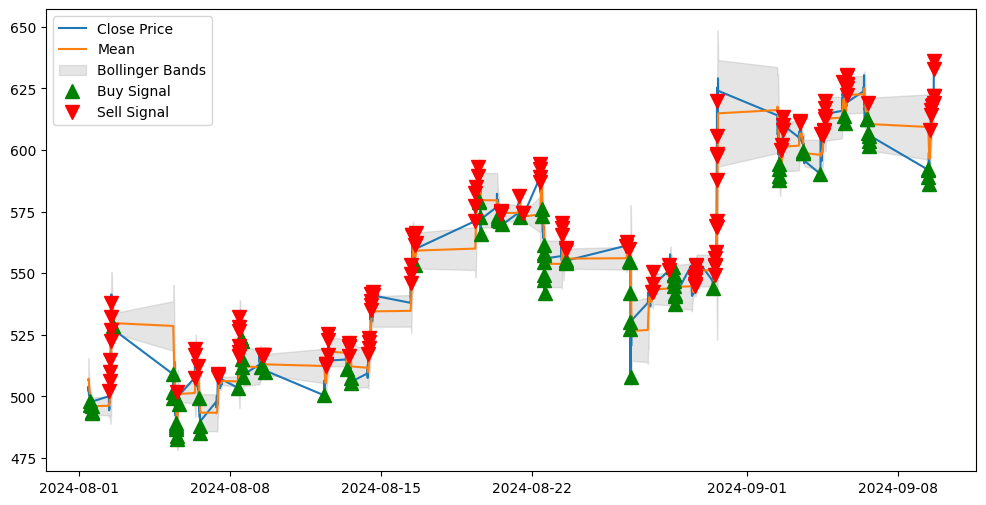

Kelly Fraction: -1.47


[*********************100%%**********************]  1 of 1 completed


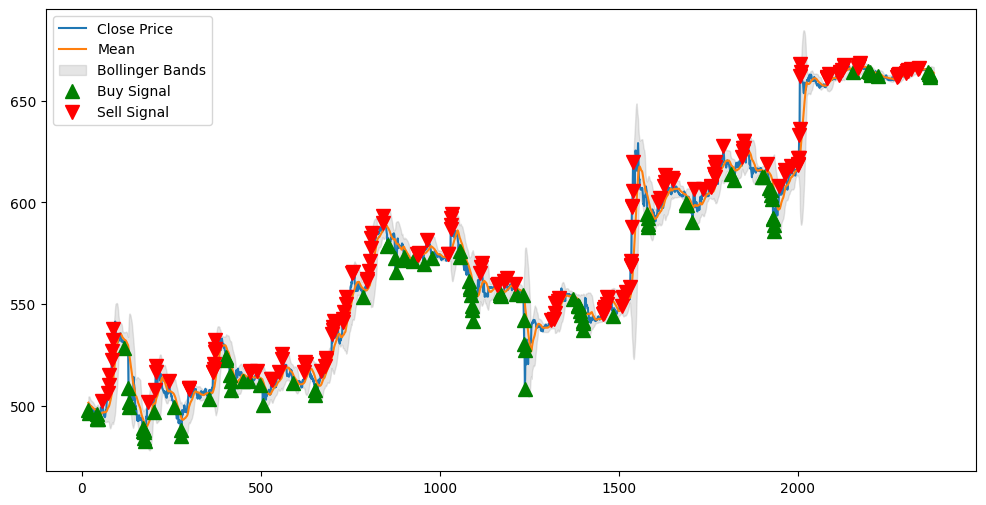

[*********************100%%**********************]  1 of 1 completed


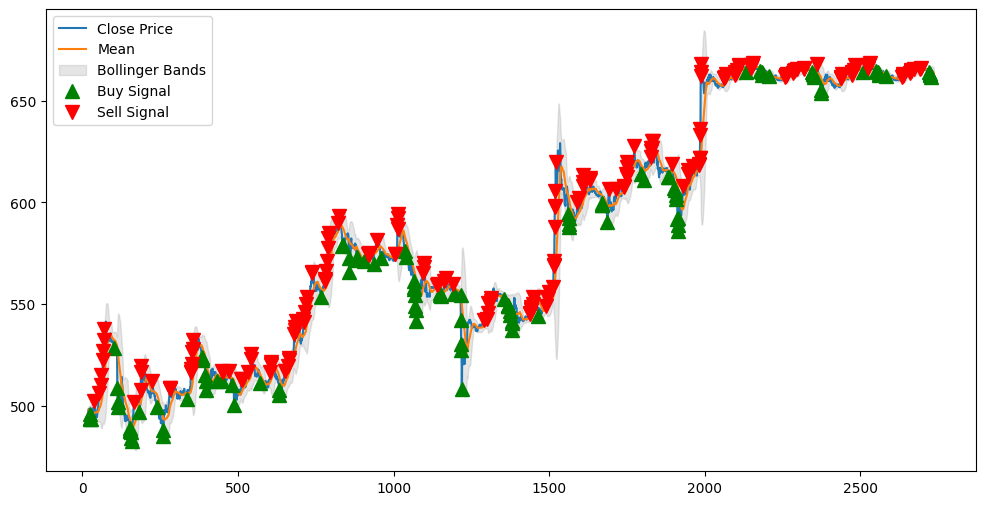

[*********************100%%**********************]  1 of 1 completed


Executing Buy order for PAYTM.NS with quantity -222


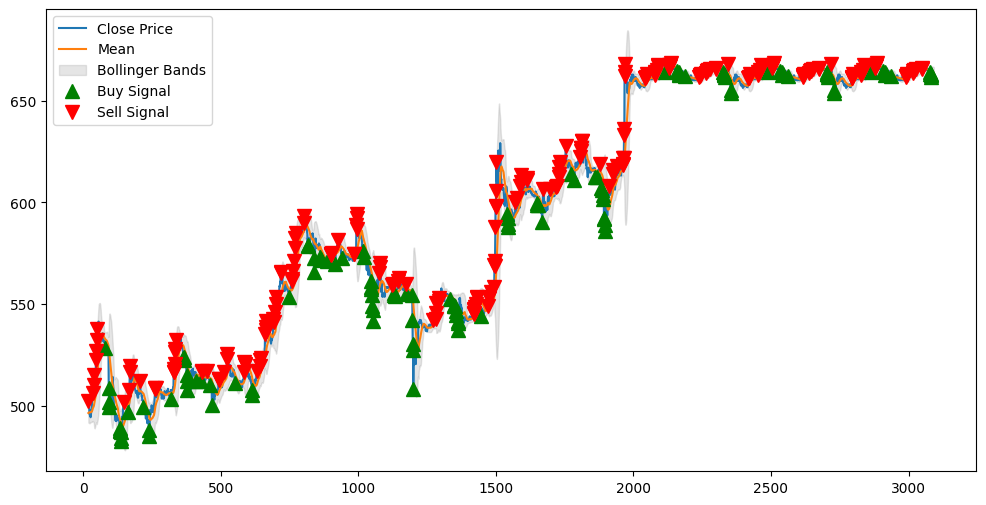

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PAYTM.NS']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


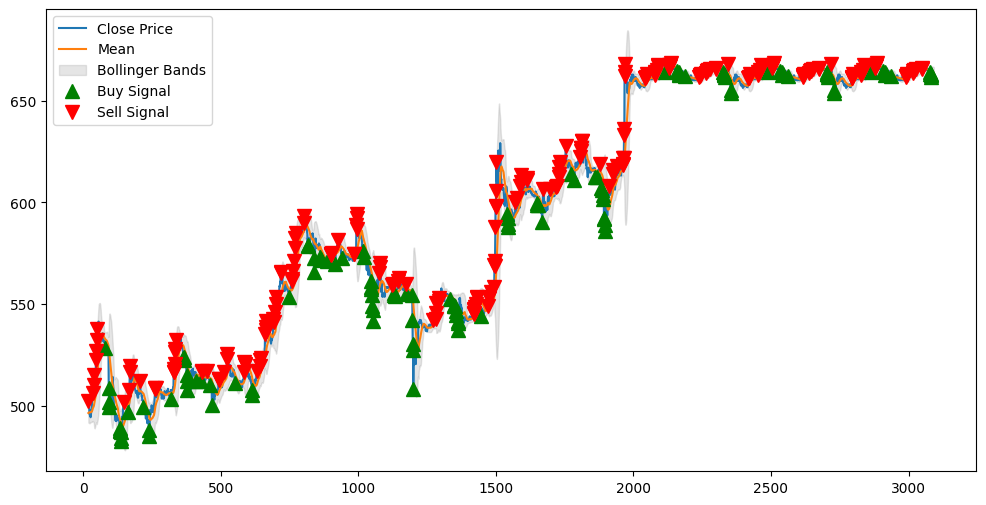

[*********************100%%**********************]  1 of 1 completed


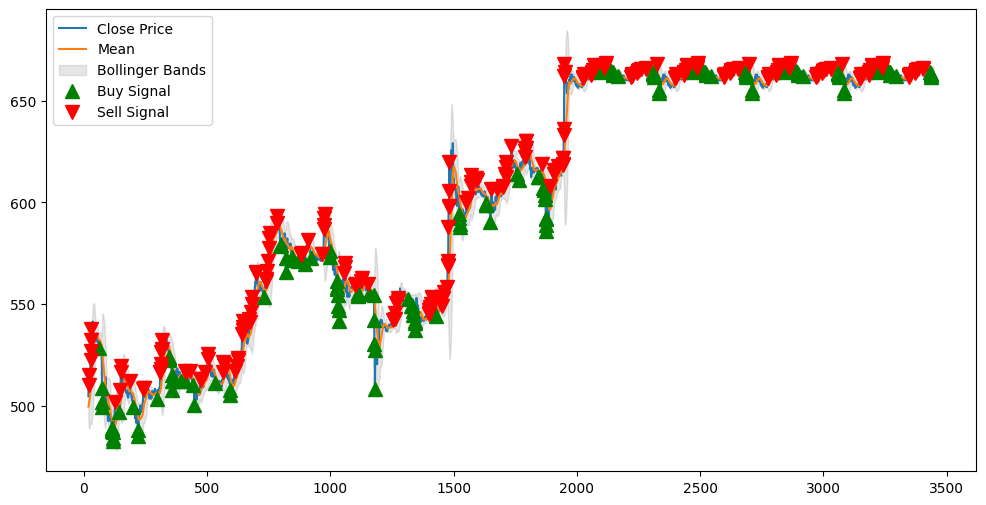

[*********************100%%**********************]  1 of 1 completed


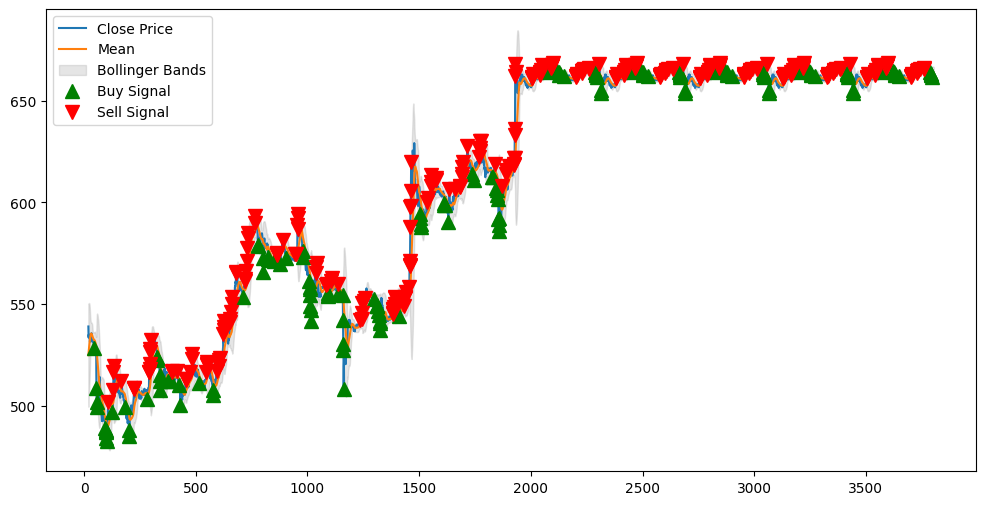

[*********************100%%**********************]  1 of 1 completed


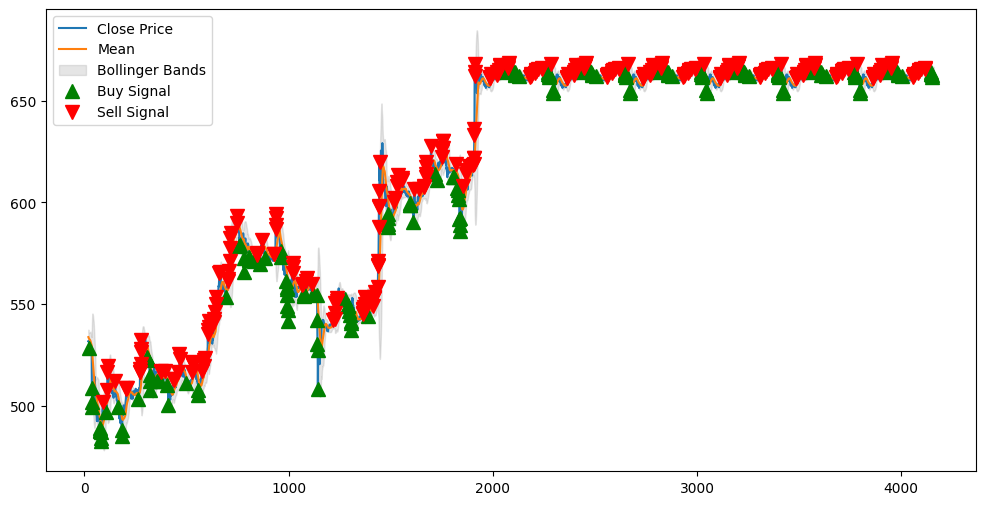

[*********************100%%**********************]  1 of 1 completed


Executing Buy order for PAYTM.NS with quantity -548


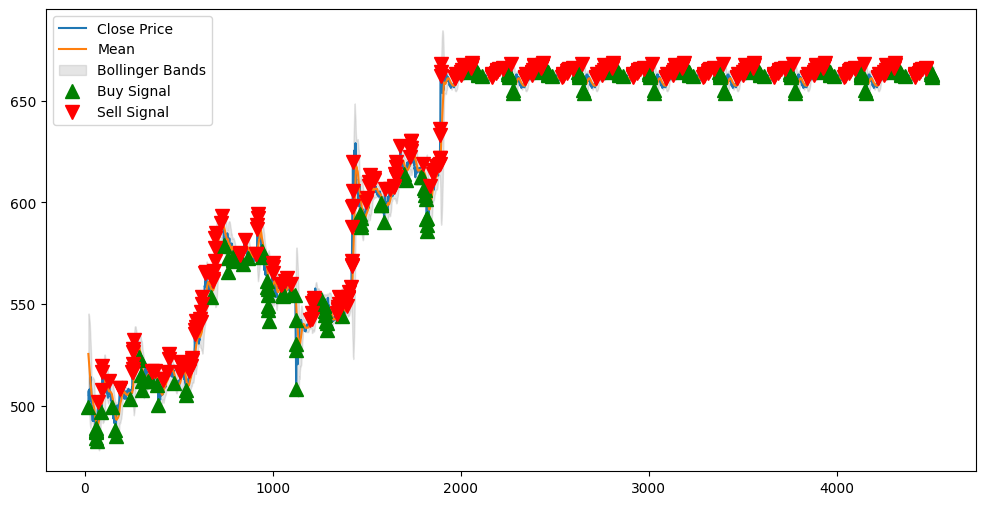

[*********************100%%**********************]  1 of 1 completed


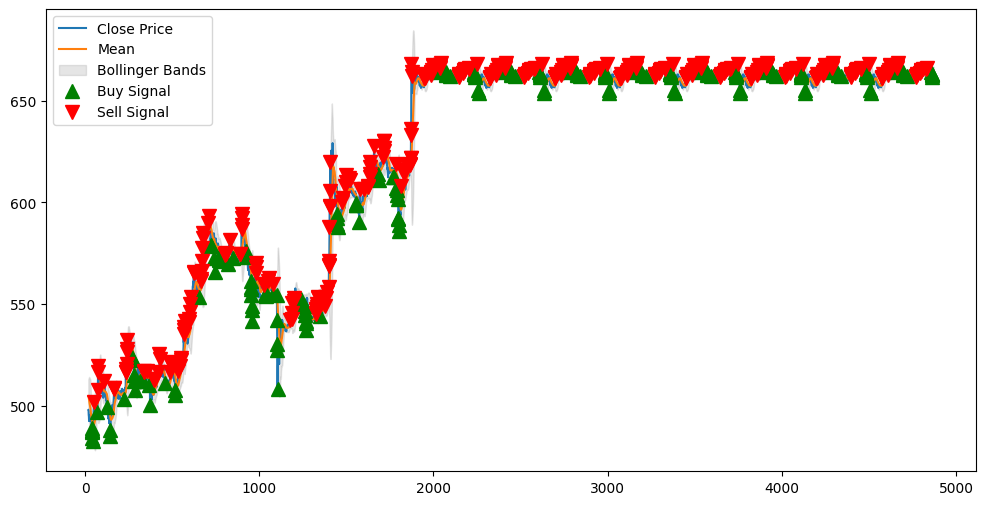

[*********************100%%**********************]  1 of 1 completed


Executing Buy order for PAYTM.NS with quantity -1352


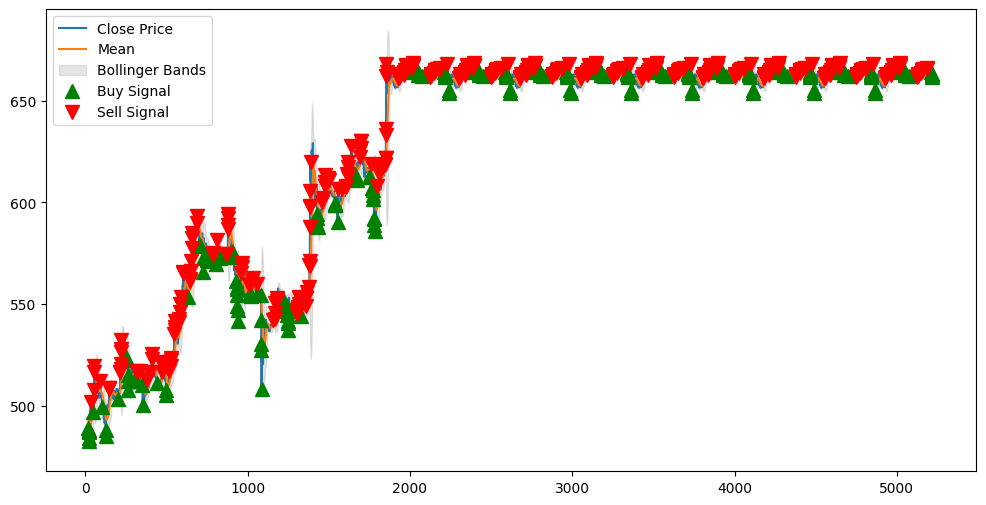

[*********************100%%**********************]  1 of 1 completed


Executing Buy order for PAYTM.NS with quantity -3338


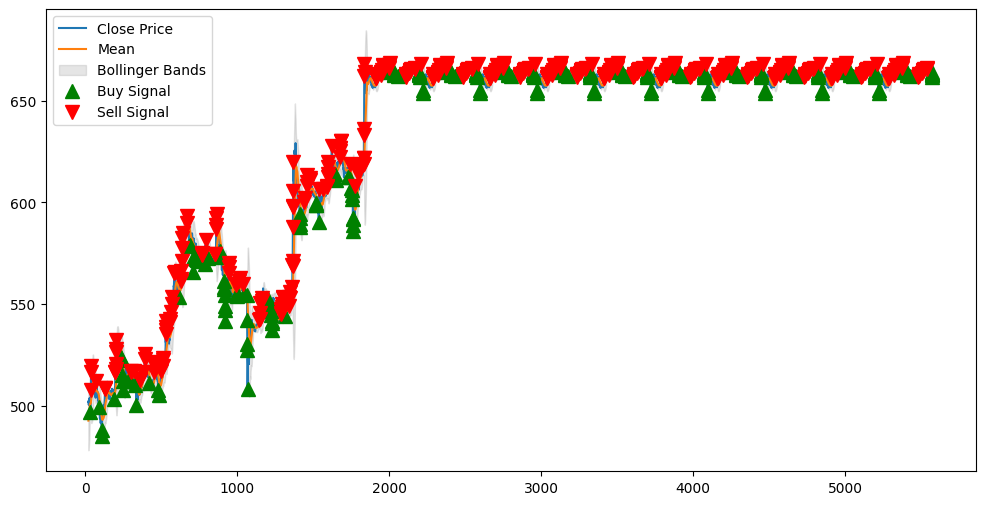

[*********************100%%**********************]  1 of 1 completed


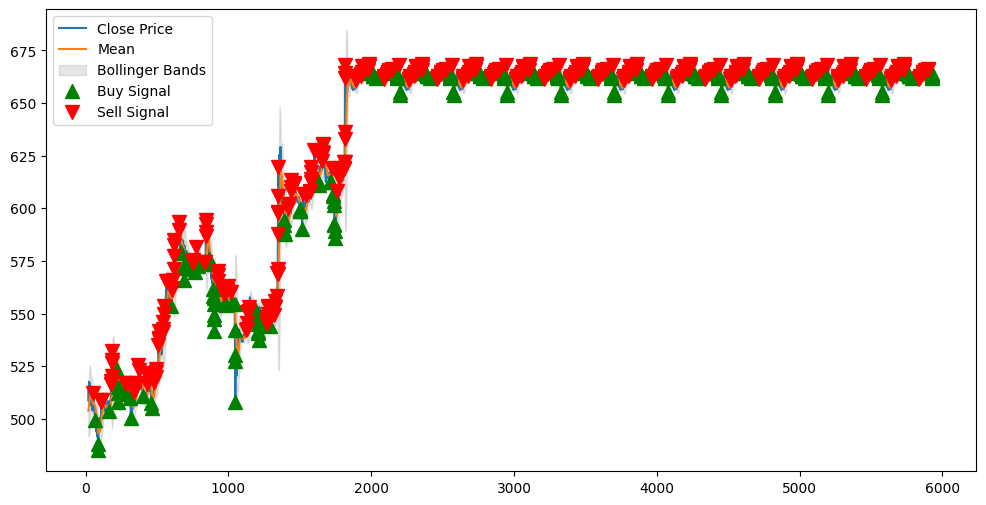

[*********************100%%**********************]  1 of 1 completed


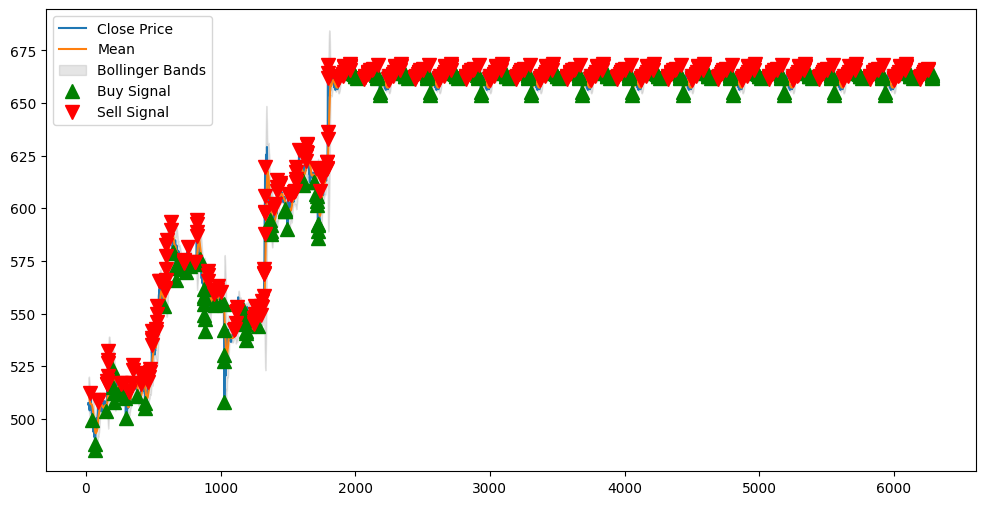

[*********************100%%**********************]  1 of 1 completed


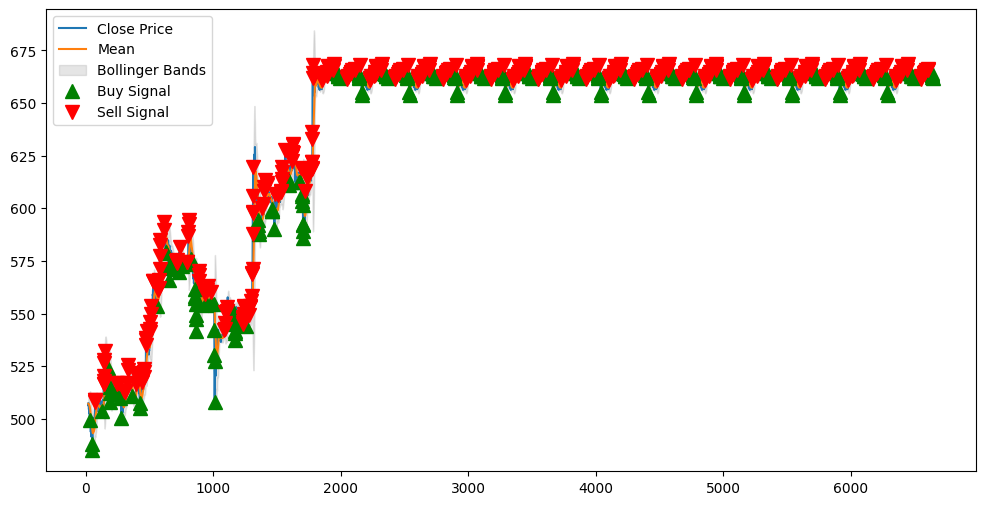

[*********************100%%**********************]  1 of 1 completed


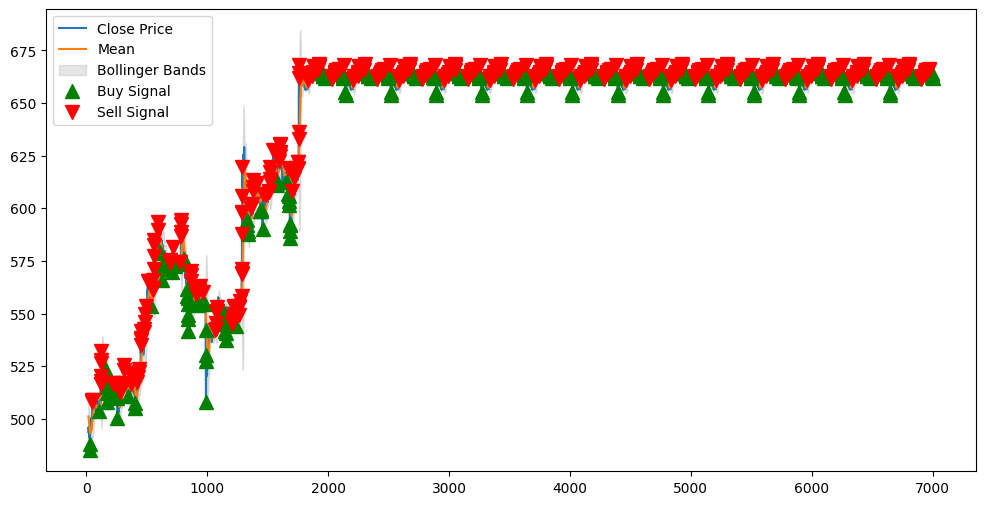

[*********************100%%**********************]  1 of 1 completed


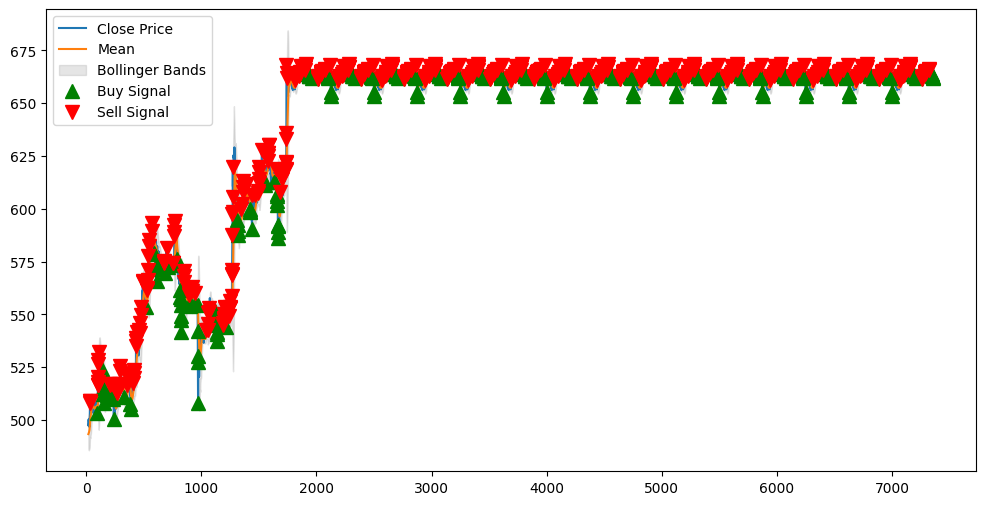

[*********************100%%**********************]  1 of 1 completed


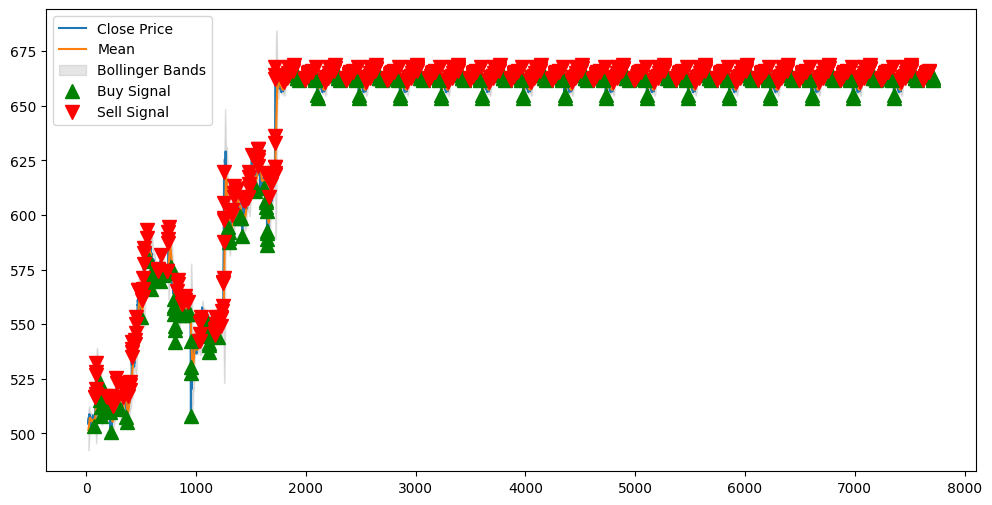

[*********************100%%**********************]  1 of 1 completed


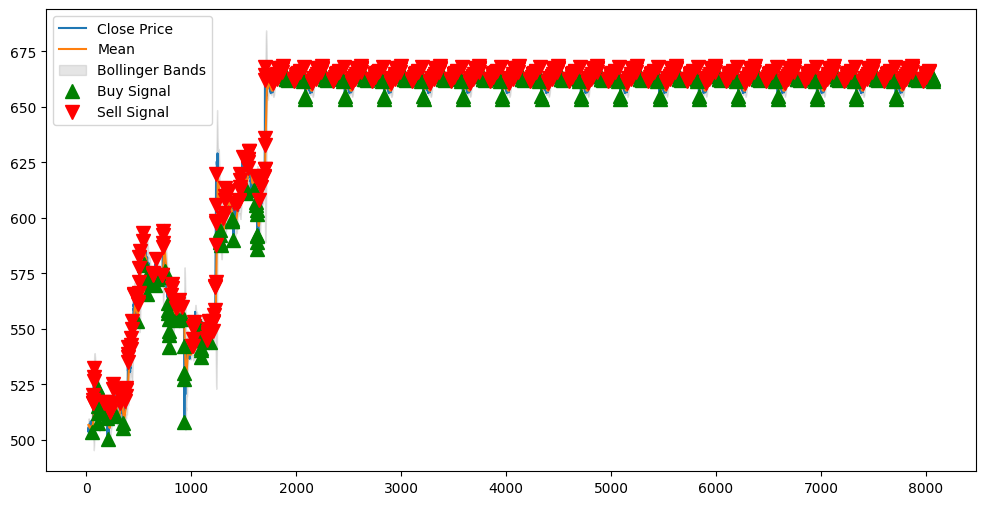

[*********************100%%**********************]  1 of 1 completed


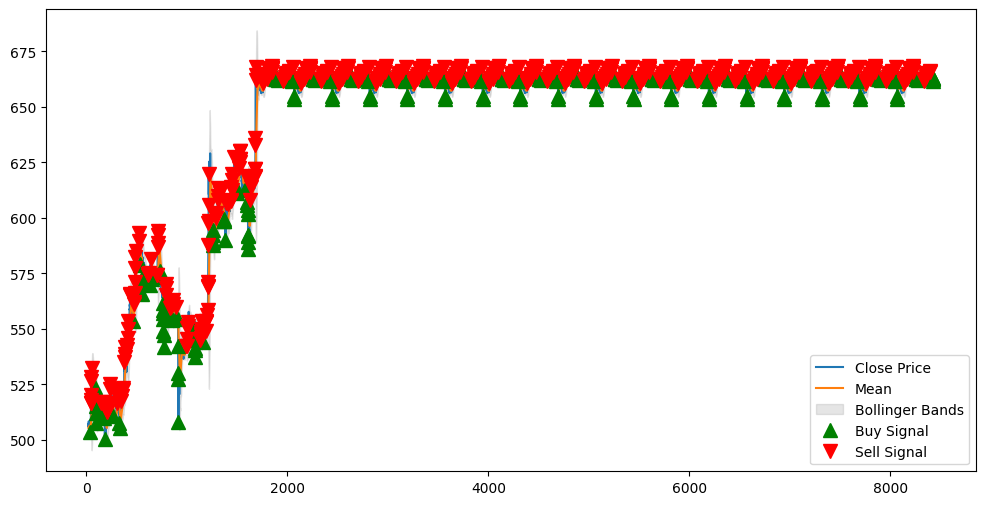

[*********************100%%**********************]  1 of 1 completed


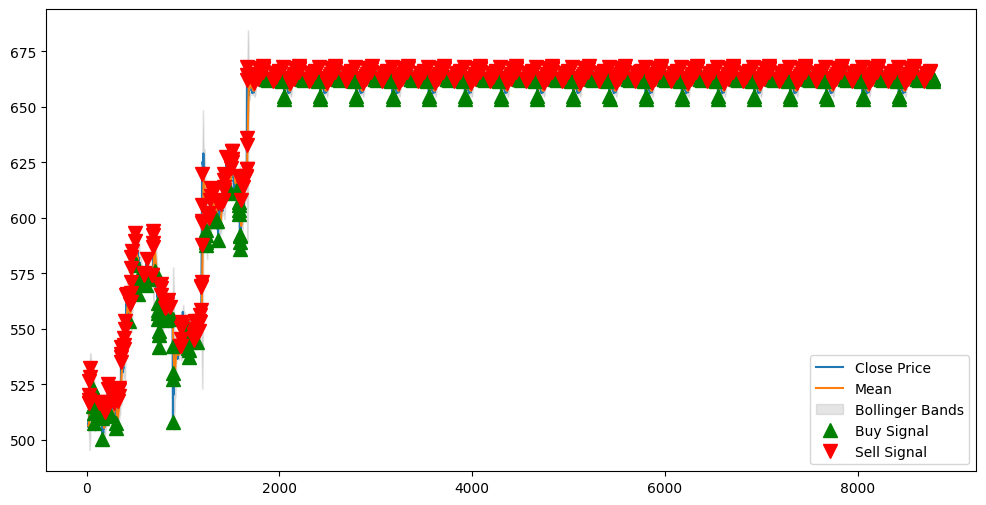

[*********************100%%**********************]  1 of 1 completed


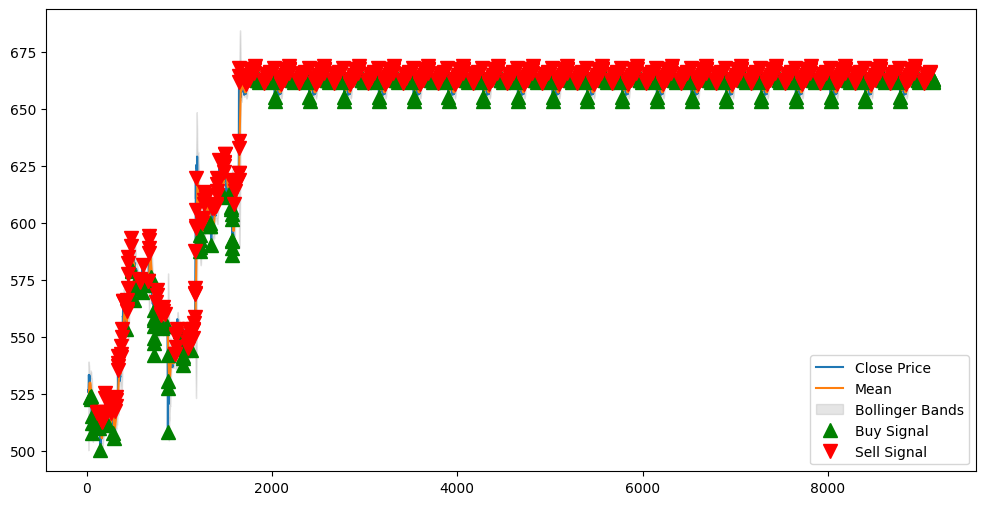

[*********************100%%**********************]  1 of 1 completed


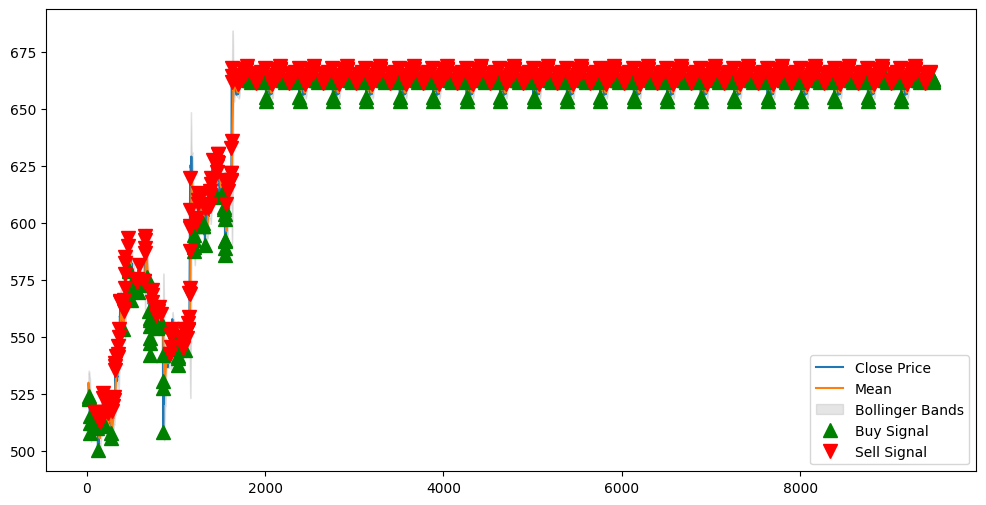

[*********************100%%**********************]  1 of 1 completed


Executing Buy order for PAYTM.NS with quantity -8240


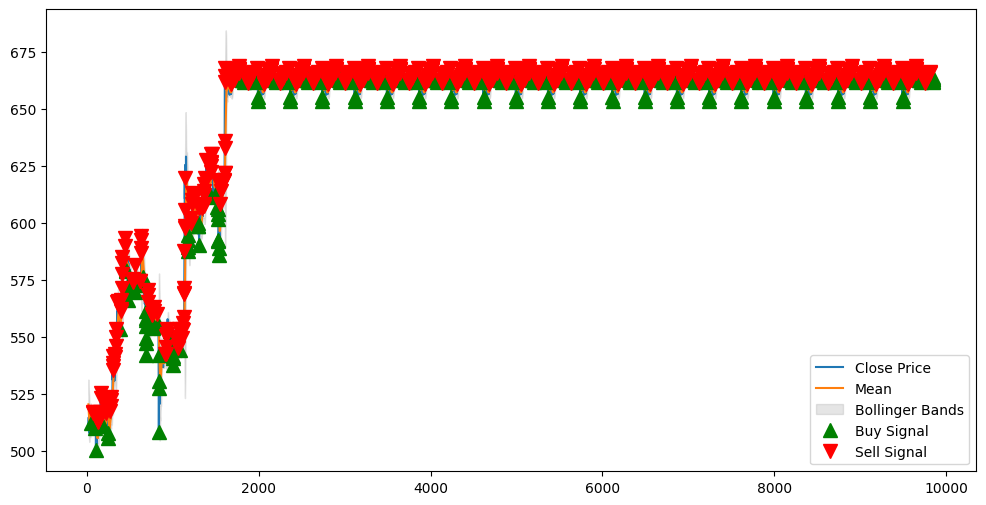

[*********************100%%**********************]  1 of 1 completed


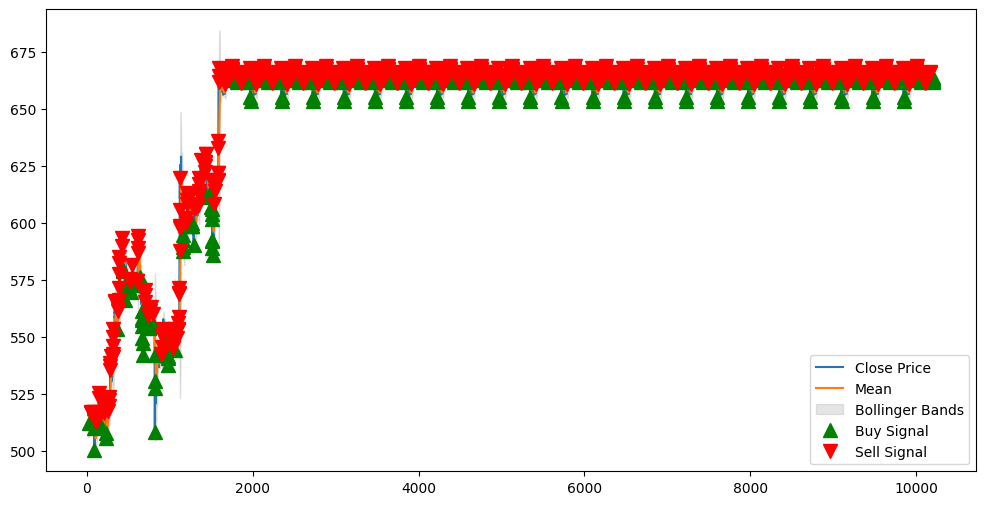

[*********************100%%**********************]  1 of 1 completed


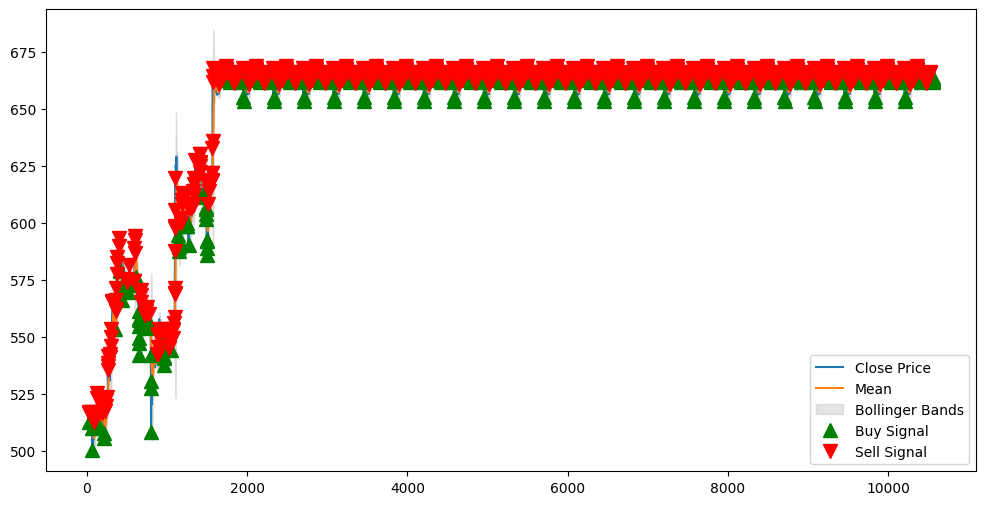

[*********************100%%**********************]  1 of 1 completed


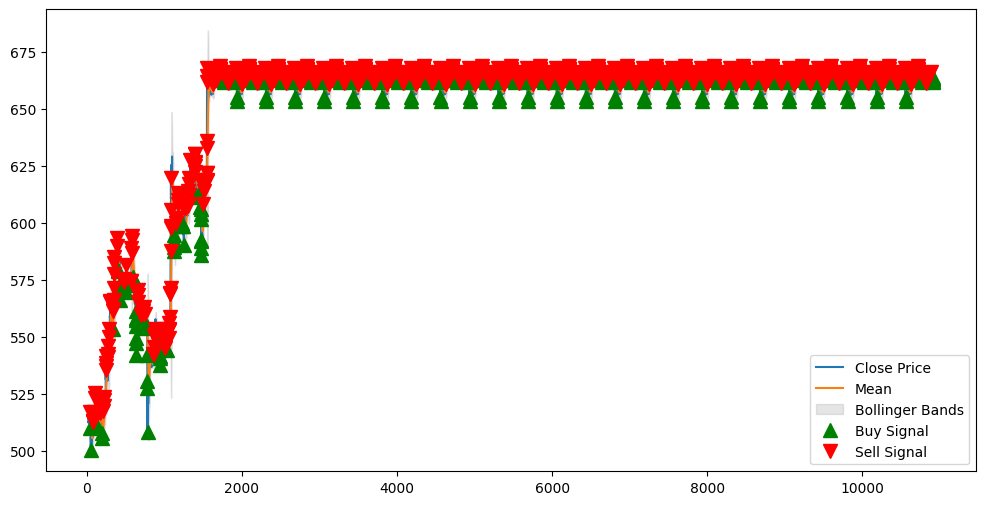

[*********************100%%**********************]  1 of 1 completed


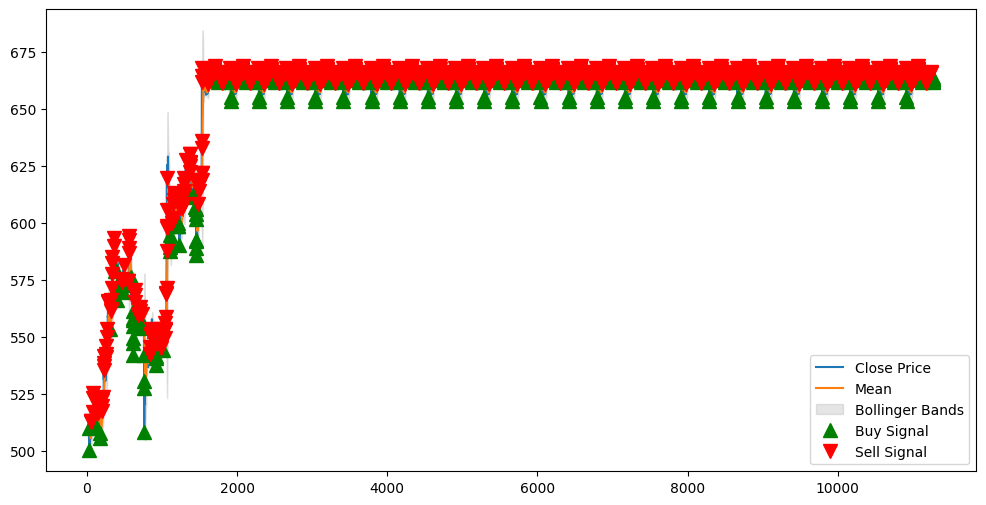

[*********************100%%**********************]  1 of 1 completed


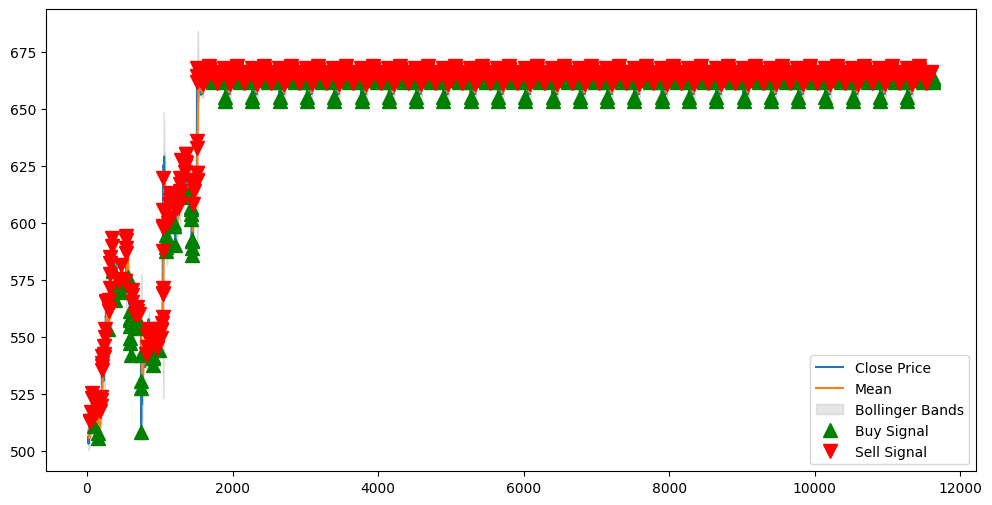

[*********************100%%**********************]  1 of 1 completed


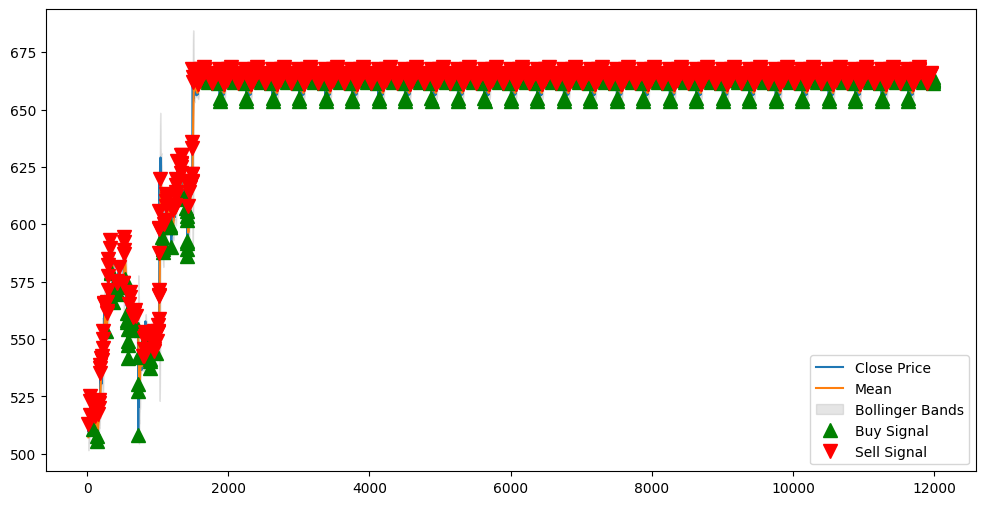

[*********************100%%**********************]  1 of 1 completed


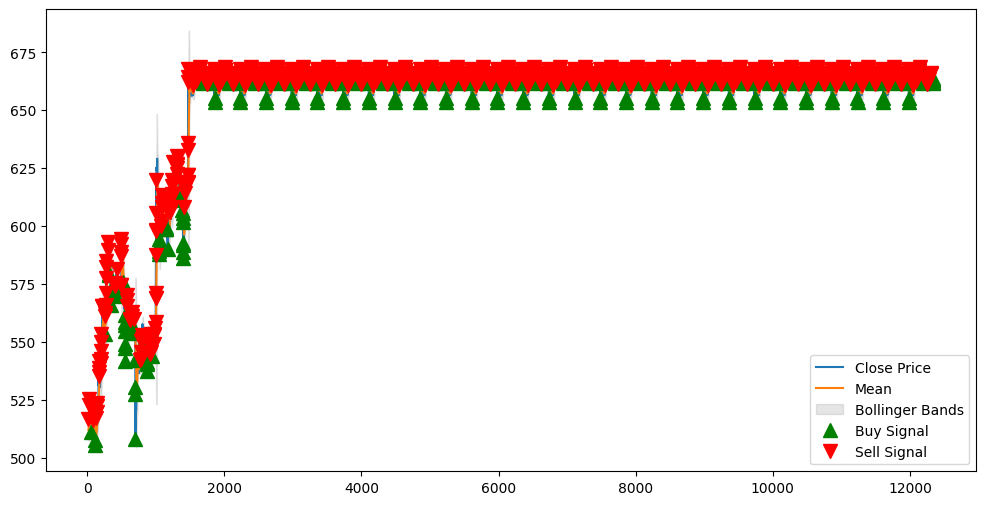

[*********************100%%**********************]  1 of 1 completed


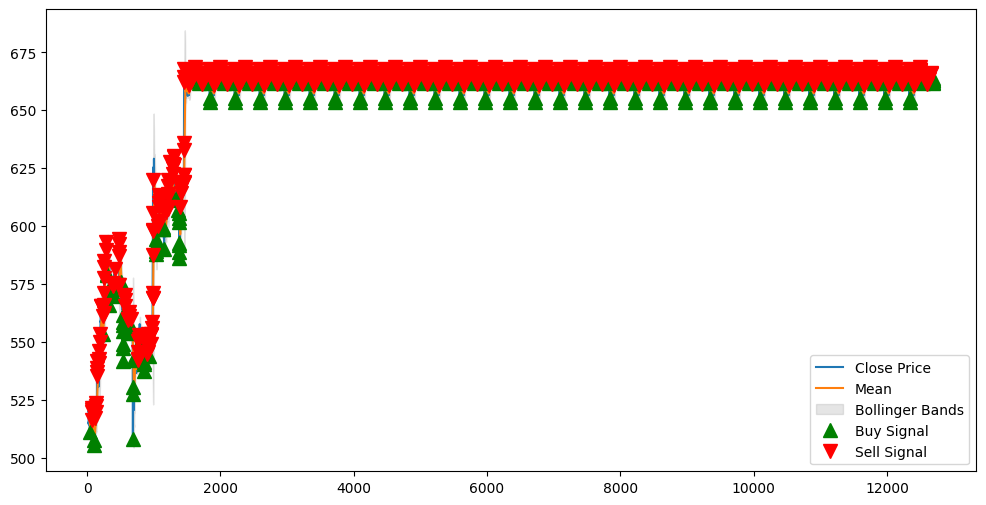

[*********************100%%**********************]  1 of 1 completed


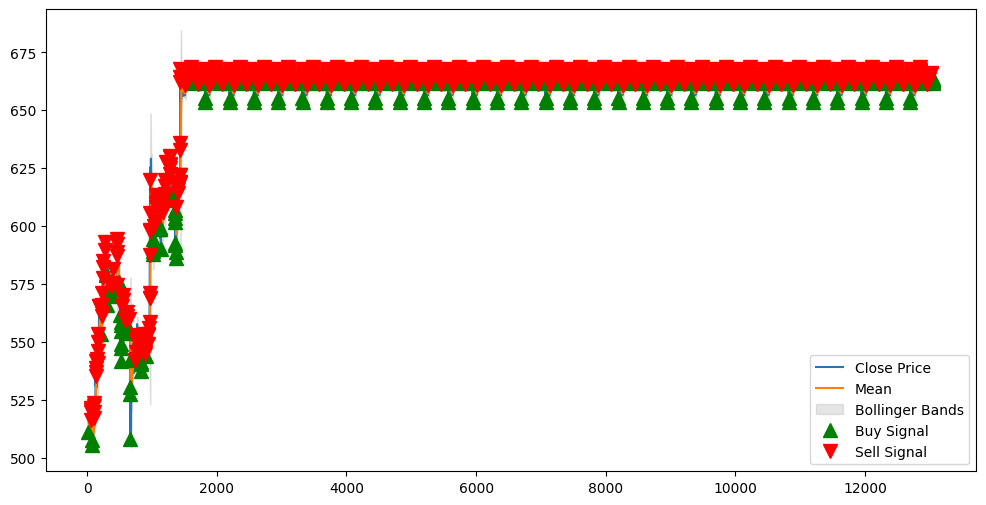

Trading stopped.


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import norm
import time
import matplotlib.pyplot as plt

# Define utility and strategy functions
def mean_reversion_strategy(df, window=20, std_dev=2):
    """
    Apply mean reversion strategy using Bollinger Bands and Z-score.

    Parameters:
    df (DataFrame): DataFrame containing stock price data
    window (int): Rolling window size for calculating mean and std deviation
    std_dev (int): Standard deviation multiplier for bands

    Returns:
    DataFrame: DataFrame with added mean, std, upper_band, lower_band, z_score, and signal columns
    """
    df = df.copy()
    df['mean'] = df['Close'].rolling(window=window).mean()
    df['std'] = df['Close'].rolling(window=window).std()
    df['z_score'] = (df['Close'] - df['mean']) / df['std']
    
    df['upper_band'] = df['mean'] + (std_dev * df['std'])
    df['lower_band'] = df['mean'] - (std_dev * df['std'])

    df['signal'] = 0
    df.loc[df['z_score'] < -std_dev, 'signal'] = 1
    df.loc[df['z_score'] > std_dev, 'signal'] = -1
    
    return df.dropna()

def gbm_simulation(S0, T, mu, sigma, dt=1/252):
    """
    Simulate Geometric Brownian Motion for stock price prediction.

    Parameters:
    S0 (float): Initial stock price
    T (float): Time period (in years)
    mu (float): Expected return
    sigma (float): Volatility
    dt (float): Time increment (in years)

    Returns:
    np.array: Simulated stock prices
    """
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)  # Standard Brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)  # GBM
    return S

def execute_trade(signal, symbol, qty):
    """
    Simulate trade execution.

    Parameters:
    signal (int): Trading signal (1 for buy, -1 for sell)
    symbol (str): Stock symbol
    qty (int): Quantity to trade

    Returns:
    None
    """
    if signal == 1:
        print(f"Executing Buy order for {symbol} with quantity {qty}")
    elif signal == -1:
        print(f"Executing Sell order for {symbol} with quantity {qty}")

def fetch_historical_data(ticker, start_date, end_date, interval):
    """
    Fetch historical stock data from Yahoo Finance.

    Parameters:
    ticker (str): Stock ticker symbol
    start_date (str): Start date for fetching data
    end_date (str): End date for fetching data
    interval (str): Data interval (e.g., '1d', '5m')

    Returns:
    DataFrame: Historical stock data
    """
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return data

def fetch_real_time_data(ticker):
    """
    Fetch real-time stock data from Yahoo Finance.

    Parameters:
    ticker (str): Stock ticker symbol

    Returns:
    DataFrame: Real-time stock data
    """
    data = yf.download(ticker, period='1d', interval='1m')
    return data

def update_data_frame(df, new_data):
    """
    Update DataFrame with new data and remove duplicates.

    Parameters:
    df (DataFrame): Original DataFrame
    new_data (DataFrame): New data to be added

    Returns:
    DataFrame: Updated DataFrame
    """
    return pd.concat([df, new_data]).drop_duplicates().reset_index(drop=True)

def calculate_kelly_criterion(win_prob, win_loss_ratio):
    """
    Calculate Kelly criterion for optimal bet size.

    Parameters:
    win_prob (float): Probability of winning
    win_loss_ratio (float): Ratio of average win to average loss

    Returns:
    float: Kelly fraction
    """
    return win_prob - (1 - win_prob) / win_loss_ratio

def plot_signals(df):
    """
    Plot stock prices with trading signals and Bollinger Bands.

    Parameters:
    df (DataFrame): DataFrame containing stock price data and signals

    Returns:
    None
    """
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.plot(df.index, df['mean'], label='Mean')
    plt.fill_between(df.index, df['lower_band'], df['upper_band'], color='gray', alpha=0.2, label='Bollinger Bands')
    buy_signals = df[df['signal'] == 1]
    sell_signals = df[df['signal'] == -1]
    plt.plot(buy_signals.index, buy_signals['Close'], '^', markersize=10, color='g', lw=0, label='Buy Signal')
    plt.plot(sell_signals.index, sell_signals['Close'], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
    plt.legend()
    plt.show()

# Main script for real-time trading simulation
if __name__ == "__main__":
    symbol = 'PAYTM.NS'
    start_date = '2024-08-01'
    end_date = '2024-09-10'
    interval = '5m'

    # Fetch historical data and apply mean reversion strategy
    historical_data = fetch_historical_data(symbol, start_date, end_date, interval)
    historical_data = historical_data[historical_data.index.notnull()]  # Ensure there are no null indices
    real_time_df = mean_reversion_strategy(historical_data)

    # Plot initial signals
    plot_signals(real_time_df)

    # Calculate historical performance metrics for Kelly criterion
    historical_df = mean_reversion_strategy(historical_data)
    historical_df['returns'] = historical_df['Close'].pct_change()
    historical_df['strategy_returns'] = historical_df['signal'].shift(1) * historical_df['returns']

    win_prob = (historical_df['strategy_returns'] > 0).mean()
    win_loss_ratio = historical_df['strategy_returns'][historical_df['strategy_returns'] > 0].mean() / -historical_df['strategy_returns'][historical_df['strategy_returns'] < 0].mean()

    kelly_fraction = calculate_kelly_criterion(win_prob, win_loss_ratio)
    print(f"Kelly Fraction: {kelly_fraction:.2f}")

    # Initialize capital
    capital = 100000  # example initial capital

    # Initialize trade log
    trade_log = []

    # Main loop for real-time trading
    while True:
        try:
            # Fetch real-time data
            new_data = fetch_real_time_data(symbol)
            if not new_data.empty:
                new_data = new_data[new_data.index.notnull()]  # Ensure there are no null indices
                real_time_df = update_data_frame(real_time_df, new_data)
                real_time_df = mean_reversion_strategy(real_time_df)
                signal = real_time_df['signal'].iloc[-1]
                
                # Simulate future prices using GBM
                S0 = real_time_df['Close'].iloc[-1]
                T = 1/252  # 1 day
                mu = 0.001  # example expected return
                sigma = 0.02  # example volatility
                simulated_prices = gbm_simulation(S0, T, mu, sigma)
                expected_price = simulated_prices[-1]
                
                # Add GBM-based signal logic
                if expected_price > real_time_df['upper_band'].iloc[-1]:
                    signal = -1
                elif expected_price < real_time_df['lower_band'].iloc[-1]:
                    signal = 1
                
                # Determine position size based on Kelly criterion
                position_size = int(capital * kelly_fraction / S0)
                
                # Log trade
                trade_log.append({
                    'time': pd.Timestamp.now(),
                    'symbol': symbol,
                    'signal': 'Buy' if signal == 1 else 'Sell',
                    'quantity': position_size,
                    'price': S0
                })
                
                execute_trade(signal, symbol, qty=position_size)
                
                # Update capital based on the trade
                if signal == 1:
                    capital -= position_size * S0
                elif signal == -1:
                    capital += position_size * S0

            # Plot updated signals
            plot_signals(real_time_df)
            
            # Wait for 1 minute before the next iteration
            time.sleep(60)
        
        except KeyboardInterrupt:
            print("Trading stopped.")
            break
        except Exception as e:
            print(f"Error: {e}")
            continue

    # Convert

In [6]:
import backtrader as bt
import yfinance as yf
import numpy as np
from scipy.optimize import linprog
import IPython

# Bayes' Theorem to update the probability of mean reversion
def bayesian_update(prior_prob, likelihood, marginal_prob):
    if marginal_prob == 0:
        return 0
    return (likelihood * prior_prob) / marginal_prob

# Function to optimize position size using Linear Programming
def optimize_position(prices, capital, risk_factor):
    n = len(prices)
    # Coefficients for the objective function (negative for maximization)
    c = -np.array(prices)

    # Inequality constraint matrix
    A = np.array([[1] * n])
    # Inequality constraint bounds
    b = [capital * risk_factor]

    # Bounds for each position (no short selling)
    x_bounds = [(0, None) for _ in range(n)]

    # Solve the linear programming problem
    res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')
    
    if res.success:
        return res.x  # Optimal positions
    else:
        return np.zeros(n)  # No valid solution found

class BayesianLPMeanReversionStrategy(bt.Strategy):
    params = (
        ('period', 20),
        ('devfactor', 2.0),
        ('reversal_prob', 0.5),
        ('signal_strength', 0.7),
        ('signal_prob', 0.6),
        ('risk_factor', 0.1),  # Risk factor for LP
    )

    def __init__(self):
        self.sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.period)
        self.stddev = bt.indicators.StandardDeviation(self.data.close, period=self.params.period)
        self.upper_band = self.sma + self.stddev * self.params.devfactor
        self.lower_band = self.sma - self.stddev * self.params.devfactor
        self.buy_signal = self.data.close < self.lower_band
        self.sell_signal = self.data.close > self.upper_band
        self.buy_orders = []
        self.sell_orders = []

    def next(self):
        if not self.position:
            buy_prob = bayesian_update(self.params.reversal_prob, self.params.signal_strength, self.params.signal_prob)
            if self.buy_signal and buy_prob > 0.6:
                # Optimize position size using Linear Programming
                prices = [self.data.close[0]]  # Current price
                capital = self.broker.getvalue()  # Available capital
                positions = optimize_position(prices, capital, self.params.risk_factor)
                
                if positions[0] > 0:
                    self.buy(size=int(positions[0]))
                    print(f"Buy Signal: Updated Buy Probability = {buy_prob:.2f}, Position Size = {positions[0]}")

        elif self.position:
            sell_prob = bayesian_update(self.params.reversal_prob, self.params.signal_strength, self.params.signal_prob)
            if self.sell_signal and sell_prob > 0.6:
                prices = [self.data.close[0]]
                capital = self.broker.getvalue()
                positions = optimize_position(prices, capital, self.params.risk_factor)
                
                if positions[0] > 0:
                    self.sell(size=int(positions[0]))
                    print(f"Sell Signal: Updated Sell Probability = {sell_prob:.2f}, Position Size = {positions[0]}")

# Function to fetch historical data using yfinance
def get_historical_data(symbol, start, end):
    data = yf.download(symbol, start=start, end=end)
    return data

# Create and set up the backtest environment
def run_bayesian_lp_backtest(symbol='AAPL', start='2022-01-01', end='2023-01-01'):
    data = get_historical_data(symbol, start, end)
    data_feed = bt.feeds.PandasData(dataname=data)

    cerebro = bt.Cerebro()
    cerebro.addstrategy(BayesianLPMeanReversionStrategy)
    cerebro.adddata(data_feed)
    cerebro.broker.setcash(100000.0)
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name="sharpe")
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name="drawdown")
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trades")

    results = cerebro.run()
    sharpe_ratio = results[0].analyzers.sharpe.get_analysis()
    drawdown = results[0].analyzers.drawdown.get_analysis()
    trades = results[0].analyzers.trades.get_analysis()

    #print(f"Sharpe Ratio: {sharpe_ratio['sharperatio']:.2f}")
    print(f"Max Drawdown: {drawdown.max.drawdown:.2f}%")
    print(f"Total Trades: {trades.total.total}")
    print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")

    cerebro.plot()

# Run the backtest for AAPL from 2022-01-01 to 2023-01-01
if __name__ == "__main__":
    run_bayesian_lp_backtest(symbol='AAPL', start='2022-01-01', end='2023-01-01')


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AAPL']: ConnectionError(ProtocolError('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)))
C:\Users\Dell\Desktop\RT2\env\Lib\site-packages\backtrader\cerebro.py:670: SyntaxWarning: invalid escape sequence '\*'
  '''Adds a callback to get messages which would be handled by the
C:\Users\Dell\Desktop\RT2\env\Lib\site-packages\backtrader\cerebro.py:712: SyntaxWarning: invalid escape sequence '\*'
  '''Adds a callback to get messages which would be handled by the


IndexError: array assignment index out of range

### import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt

# Define the mean reversion strategy using Backtrader
class MeanReversionStrategy(bt.Strategy):
    params = (
        ('period', 20),      # Lookback period for the rolling mean
        ('devfactor', 2.0),  # Standard deviation multiplier
    )

    def __init__(self):
        # Calculate simple moving average (SMA) and Bollinger Bands (upper and lower)
        self.sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.period)
        self.stddev = bt.indicators.StandardDeviation(self.data.close, period=self.params.period)
        self.upper_band = self.sma + self.stddev * self.params.devfactor
        self.lower_band = self.sma - self.stddev * self.params.devfactor

        # Set up signals
        self.buy_signal = self.data.close < self.lower_band
        self.sell_signal = self.data.close > self.upper_band

    def next(self):
        # Buy if the price crosses below the lower Bollinger Band
        if not self.position and self.buy_signal:
            self.buy(size=100)

        # Sell if the price crosses above the upper Bollinger Band
        elif self.position and self.sell_signal:
            self.sell(size=100)

# Function to fetch historical data using yfinance
def get_historical_data(symbol, start, end):
    data = yf.download(symbol, start=start, end=end)
    return data

# Create and set up the backtest environment
def run_backtest(symbol='AAPL', start='2022-01-01', end='2023-01-01'):
    # Fetch historical stock data
    data = get_historical_data(symbol, start, end)
    
    # Prepare data for Backtrader
    data_feed = bt.feeds.PandasData(dataname=data)

    # Set up the Backtrader engine
    cerebro = bt.Cerebro()
    cerebro.addstrategy(MeanReversionStrategy)

    # Add the data feed to Backtrader
    cerebro.adddata(data_feed)

    # Set starting capital
    cerebro.broker.setcash(100000.0)

    # Add performance analyzers (e.g., Sharpe Ratio, Drawdown)
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name="sharpe")
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name="drawdown")
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trades")

    # Run the backtest
    results = cerebro.run()

    # Get analyzers for performance metrics
    sharpe_ratio = results[0].analyzers.sharpe.get_analysis()
    drawdown = results[0].analyzers.drawdown.get_analysis()
    trades = results[0].analyzers.trades.get_analysis()

    # Print performance summary
    #print(f"Sharpe Ratio: {sharpe_ratio['sharperatio']:.2f}")
    print(f"Max Drawdown: {drawdown.max.drawdown:.2f}%")
    print(f"Total Trades: {trades.total.total}")
    print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")

    # Plot the strategy's performance
    cerebro.plot()

# Run the backtest for AAPL from 2022-01-01 to 2023-01-01
if __name__ == "__main__":
    run_backtest(symbol='AAPL', start='2022-09-21', end='2024-09-21')

In [18]:
import backtrader as bt
import yfinance as yf
import numpy as np
from scipy.optimize import linprog

# Function to optimize position size using Linear Programming
def optimize_position(prices, capital, risk_factor):
    n = len(prices)
    # Coefficients for the objective function (negative for maximization)
    c = -np.array(prices)

    # Inequality constraint matrix
    A = np.array([[1] * n])
    # Inequality constraint bounds
    b = [capital * risk_factor]

    # Bounds for each position (no short selling)
    x_bounds = [(0, None) for _ in range(n)]

    # Solve the linear programming problem
    res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')
    
    if res.success:
        return res.x  # Optimal positions
    else:
        return np.zeros(n)  # No valid solution found

# Bayes' Theorem to update the probability of mean reversion
def bayesian_update(prior_prob, likelihood, marginal_prob):
    if marginal_prob == 0:
        return 0
    return (likelihood * prior_prob) / marginal_prob

class BayesianLPMeanReversionStrategy(bt.Strategy):
    params = (
        ('period', 20),
        ('devfactor', 2.0),
        ('reversal_prob', 0.5),
        ('signal_strength', 0.7),
        ('signal_prob', 0.6),
        ('risk_factor', 0.1),  # Risk factor for LP
    )

    def __init__(self):
        self.sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.period)
        self.stddev = bt.indicators.StandardDeviation(self.data.close, period=self.params.period)
        self.upper_band = self.sma + self.stddev * self.params.devfactor
        self.lower_band = self.sma - self.stddev * self.params.devfactor
        self.buy_signal = self.data.close < self.lower_band
        self.sell_signal = self.data.close > self.upper_band
        self.buy_orders = []
        self.sell_orders = []

    def next(self):
        if not self.position:
            buy_prob = bayesian_update(self.params.reversal_prob, self.params.signal_strength, self.params.signal_prob)
            if self.buy_signal and buy_prob > 0.6:
                # Optimize position size using Linear Programming
                prices = [self.data.close[0]]  # Current price
                capital = self.broker.getvalue()  # Available capital
                positions = optimize_position(prices, capital, self.params.risk_factor)
                
                if positions[0] > 0:
                    self.buy(size=int(positions[0]))
                    print(f"Buy Signal: Updated Buy Probability = {buy_prob:.2f}, Position Size = {positions[0]}")

        elif self.position:
            sell_prob = bayesian_update(self.params.reversal_prob, self.params.signal_strength, self.params.signal_prob)
            if self.sell_signal and sell_prob > 0.6:
                prices = [self.data.close[0]]
                capital = self.broker.getvalue()
                positions = optimize_position(prices, capital, self.params.risk_factor)
                
                if positions[0] > 0:
                    self.sell(size=int(positions[0]))
                    print(f"Sell Signal: Updated Sell Probability = {sell_prob:.2f}, Position Size = {positions[0]}")

# Function to fetch dynamic historical data using yfinance
def get_historical_data(symbol, start, end):
    data = yf.download(symbol, start=start, end=end)
    return data

# Create and set up the backtest environment with dynamic parameters
def run_bayesian_lp_backtest(symbol, start, end):
    data = get_historical_data(symbol, start, end)
    data_feed = bt.feeds.PandasData(dataname=data)

    cerebro = bt.Cerebro()
    cerebro.addstrategy(BayesianLPMeanReversionStrategy)
    cerebro.adddata(data_feed)
    cerebro.broker.setcash(100000.0)
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name="sharpe")
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name="drawdown")
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trades")

    results = cerebro.run()
    sharpe_ratio = results[0].analyzers.sharpe.get_analysis()
    drawdown = results[0].analyzers.drawdown.get_analysis()
    trades = results[0].analyzers.trades.get_analysis()

    #print(f"Sharpe Ratio: {sharpe_ratio['sharperatio']:.2f}")
    print(f"Max Drawdown: {drawdown.max.drawdown:.2f}%")
    print(f"Total Trades: {trades.total.total}")
    print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")

    cerebro.plot()

# Run the backtest for Bank Nifty (^NSEBANK) with dynamic date range
if __name__ == "__main__":
    symbol = "^NSEBANK"  # Bank Nifty symbol
    start = input("Enter start date (YYYY-MM-DD): ")
    end = input("Enter end date (YYYY-MM-DD): ")
    run_bayesian_lp_backtest(symbol, start, end)


Enter start date (YYYY-MM-DD):  2023-01-01
Enter end date (YYYY-MM-DD):  2024-01-01


[*********************100%%**********************]  1 of 1 completed


Max Drawdown: 0.00%
Total Trades: 0
Final Portfolio Value: 100000.00


<IPython.core.display.Javascript object>

In [5]:
!pip install ta-lib zipline-reloaded

  Using cached TA-Lib-0.4.32.tar.gz (368 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached zipline_reloaded-3.0.4-cp312-cp312-win_amd64.whl.metadata (24 kB)
  Using cached bcolz_zipline-1.2.10-cp312-cp312-win_amd64.whl.metadata (12 kB)
  Using cached Bottleneck-1.4.0-cp312-cp312-win_amd64.whl.metadata (8.1 kB)
  Using cached empyrical_reloaded-0.5.10-py3-none-any.whl.metadata (21 kB)
  Using cached h5py-3.11.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached intervaltree-3.1.0-py2.py3-none-any.whl
  Using cached iso3166-2.1.1-py3-none-any.whl.metadata (6.6 kB)
  Using cached iso4217-1.12.20240625-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached lru_dict-1.3.0-cp312-cp312-win_am

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [12 lines of output]
  <string>:75: UserWarning: Cannot find ta-lib library, installation may fail.
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\talib
  copying talib\abstract.py -> build\lib.win-amd64-cpython-312\talib
  copying talib\deprecated.py -> build\lib.win-amd64-cpython-312\talib
  copying talib\stream.py -> build\lib.win-amd64-cpython-312\talib
  copying talib\__init__.py -> build\lib.win-amd64-cpython-312\talib
  running build_ext
  building 'talib._ta_lib' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for ta-lib
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (ta

In [4]:
import zipline.api as z
from zipline.algorithm import TradingAlgorithm
from zipline.data.bundles import register
from zipline.finance import commission, slippage
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import linprog

# Utility function to fetch data using Yahoo Finance
def get_yahoo_data(symbol, start, end):
    return yf.download(symbol, start=start, end=end)

# Register the dataset with Zipline
def load_yahoo_bundle(symbol, start, end):
    df = get_yahoo_data(symbol, start, end)
    df.index = pd.to_datetime(df.index)
    return df

# Linear programming for optimal position sizing
def optimize_position(prices, capital, risk_factor):
    n = len(prices)
    c = -np.array(prices)  # Maximize expected return
    A = np.array([[1] * n])  # Risk constraint
    b = [capital * risk_factor]
    x_bounds = [(0, None) for _ in range(n)]  # No short selling
    res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')
    return res.x if res.success else np.zeros(n)

# Bayesian Update for probability estimation
def bayesian_update(prior, likelihood, marginal):
    if marginal == 0:
        return 0
    return (likelihood * prior) / marginal

# Define the algorithm for Zipline
class BayesianLPMeanReversion(TradingAlgorithm):

    def initialize(self):
        self.set_commission(commission.PerShare(cost=0.001))
        self.set_slippage(slippage.VolumeShareSlippage())
        self.window = 20
        self.std_dev = 2.0
        self.reversal_prob = 0.5
        self.signal_strength = 0.7
        self.signal_prob = 0.6
        self.risk_factor = 0.1
        self.buy_orders = []
        self.sell_orders = []

    def handle_data(self, context, data):
        price = data.current(context.asset, 'price')
        prices = data.history(context.asset, 'price', self.window, '1d')
        
        # Calculate moving averages and standard deviation
        mean = prices.mean()
        std = prices.std()
        upper_band = mean + std * self.std_dev
        lower_band = mean - std * self.std_dev
        
        buy_signal = price < lower_band
        sell_signal = price > upper_band

        # Bayesian Probability Update for signal strength
        buy_prob = bayesian_update(self.reversal_prob, self.signal_strength, self.signal_prob)
        sell_prob = bayesian_update(self.reversal_prob, self.signal_strength, self.signal_prob)

        capital = context.portfolio.cash
        
        if not context.portfolio.positions[context.asset].amount:
            if buy_signal and buy_prob > 0.6:
                # Optimize position size using LP
                prices = [price]
                positions = optimize_position(prices, capital, self.risk_factor)
                z.order(context.asset, int(positions[0]))
                print(f"Buy Signal: Position size {positions[0]}")
        
        elif context.portfolio.positions[context.asset].amount > 0:
            if sell_signal and sell_prob > 0.6:
                # Optimize position size for selling
                positions = optimize_position([price], capital, self.risk_factor)
                z.order(context.asset, -int(positions[0]))
                print(f"Sell Signal: Position size {positions[0]}")

# Load data dynamically and run the Zipline backtest
if __name__ == "__main__":
    symbol = "^NSEBANK"  # Bank Nifty Index
    start = input("Enter start date (YYYY-MM-DD): ")
    end = input("Enter end date (YYYY-MM-DD): ")

    data = get_yahoo_data(symbol, start, end)
    
    # Load the dataset into Zipline
    register(symbol, lambda: data, calendar_name="NYSE")
    
    algo = BayesianLPMeanReversion(
        capital_base=100000,
        data_frequency='daily',
        start=pd.Timestamp(start, tz='utc'),
        end=pd.Timestamp(end, tz='utc'),
    )
    
    # Run the algorithm on Bank Nifty data
    algo.run(data)


ModuleNotFoundError: No module named 'zipline'